<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/blob/master/01_INTRODUCCION_VARIABLES_ALEATORIAS_Y_MOMENTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


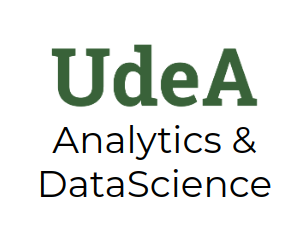

In [3]:
Image("local/imgs/udea-datascience.png")

# **Introducción a las Variables Aleatorias y Momentos**
## Desarrollado por: Ph.D. Javier Fernando Botía Valderrama
## Universidad de Antioquia

# Poblaciones y Muestras

En la estadística, es normal el uso de datos desde un conjunto de muestras selecionadas para sacar unas conclusiones derivadas del análisis de una población de datos. Debido a lo anterior, uno de los retos grandes de la estadística es determinar un tamaño de muestra de los datos que sea lo suficientemente representativo para tomar una decisión acertada. Por consiguiente, es necesario conocer la diferencia entre población y muestra:

*   **Población**: consiste en todos los elementos de un conjunto de datos.
*   **Muestras**: consiste de una o más observaciones desde la población. 

Cuando se estima un parámetro de una población, por ejemplo, la edad de los programadores de Python, tipicamente no podemos *medir* todos los programadores. Por está razón, es necesario limitar el análisis a una *muestra aleatoria* que permita inferir en una decisión o una conclusión a partir de los datos de muestra. Tales medidas son la media, la varianza, entre otras que más adelante los llamaremos como **estadísticos**, que es una caracteristica medible desde una muestra de datos.

Aunque ya sabemos la diferencia entre población y muestras, ¿Cómo se selecciona la muestra desde una población?. Para responder a esa inquietud, hay dos clases de muestreo:

*   **Muestreo sin reemplazos:** Una población de observaciones o individuos se selecciona una sola vez y *no se puede devolver de nuevo a la población*.
*   **Muestreo con reemplazos:** Se realiza una selección aleatoria de observaciones o individuos antes de que el próximo sea seleccionado. A diferencia del muestreo sin reemplazos, se puede seleccionar más de una vez la población de individuos.

Veamos un ejemplo práctico de poblaciones y muestras.

In [6]:
import pandas as pd

X = pd.DataFrame()
X['poblacion'] = [101, 150, 136, 147, 201, 180, 165, 199, 122, 133, 177, 141, 159, 205, 144, 106, 111, 185]
Muestreo_SIN = X['poblacion'].sample(6,replace = False)
Muestreo_CON = X['poblacion'].sample(6,replace = True)

print("Muestreo sin reemplazos = \n", Muestreo_SIN)
print("\n")
print("Muestreo con reemplazos = \n", Muestreo_CON)

Muestreo sin reemplazos = 
 15    106
6     165
13    205
3     147
5     180
10    177
Name: poblacion, dtype: int64


Muestreo con reemplazos = 
 15    106
16    111
0     101
8     122
9     133
1     150
Name: poblacion, dtype: int64


Otros dos conceptos que vamos a considerar para esta unidad son las siguientes:

*   **Distribución de la muestra:** Son *distribuciones* de probabilidad de una estadística dada basada en una muestra aleatoria de los datos.
*   **Inferencia estadística:** permite hacer una conjetura sobre un parámetro de la población basado en una estadística calculada a partir de una muestra extraida aleatoriamente desde esa población.

# Espacios de Probabilidad

Los espacios de probabilidad son suposiciones de las observaciones generadas por fenómenos o eventos, conociendo los *posibles resultados* que se encuentren durante la obervación o experimentación. 

En los espacios de probabilidad, se consideran tres escenarios:

1.   **Experimento Aleatorio**: Se dice que un experimento que no sabemos de antemano que posibles resultados se van a encontrar
2.   **Espacio Muestral:** Es el conjunto de posibles resultados de un experimento o evento.
3.   **Espacio Muestral Continuo:** Es el conjunto de posibles resultados de un experimento o evento cuando esta definido en un intervalo dado.
3.   **Espacio Muestral Discreto:** Es el conjunto de posibles resultados de un experimento o evento cuando esta definido de forma finita o enumerado con valores enteros.

*Ejemplos:*

A) Lanzamiento de dos dados:

$$\Omega = \lbrace (1,1), (1,2),\ldots \rbrace$$

Si cada dado tiene 6 lados, entonces el número de posibles lanzamientos es $N(\Omega) = 36$.

B) Lanzamiento de dos dados y observar el resultado de la suma.

$$\Omega = \lbrace 2, 3,\ldots, 12\rbrace$$

En este caso, el máximo número es $N(\Omega) = 12$

C) Observar el tiempo que tarda el rappitendero en llegar a la casa con el pedido.

$$\Omega = \lbrace 0, \ldots, \infty\rbrace$$ 

Si consideramos un tiempo límite, $$\Omega = \lbrace 0, \ldots, M\rbrace$$

donde $M$ es un tiempo límite que se estima por experiencia o conocimiento previo de los domicilios.

**Evento:** Es un subconjunto del espacio muestral con ciertas propiedades que se cumplen.

*Ejemplo:*

Conseremos $\mathbb{F}$ como un eventoy $\Omega$ un espacio muestral. Si $\mathbb{F} = \lbrace \emptyset, \lbrace 1\rbrace, \lbrace 2\rbrace, \lbrace 3\rbrace, \Omega \rbrace$, donde $\lbrace \cdot \rbrace$ es un subconjunto, si decimos que ocurrio un evento $\lbrace 2,3 \rbrace$, observen que no está definido en $\mathbb{F}$ y por consiguiente, no se considera como un evento existente. Sin embargo, si ampliamos los subconjuntos como $\mathbb{F} = \lbrace \emptyset, \lbrace 1\rbrace, \lbrace 2\rbrace, \lbrace 3\rbrace, \lbrace 1,2 \rbrace, \lbrace 2,3 \rbrace, \lbrace 1,3\rbrace, \Omega \rbrace$, y consideramos de nuevo el evento $\lbrace 2,3 \rbrace$, entonces podemos afirmar que si sucedio el evento. 

*Nota:* El signo $\emptyset$ que es el vacio en teoría de conjuntos, para el concepto de evento significa que es un evento imposible que se presente.

**Ocurrencia de un evento:** Consideremos $A$ como un evento. Si $A$ ocurre, entonces el experimento u observación se obtiene un elemento de $A$.

*Ejemplo:*

Considere $A$ como el lanzamiento de un dado. Si hay un evento que salga par, entonces si lanza el dado y se obtiene un número par, como el número 4, se dice que el evento ocurre.

**Ocurrencia de dos eventos:** Si $A$ y $B$ son dos eventos, entonces se simboliza como $A \cap B$.

*Ejemplo:* 

Si $A$ es el lanzamientos de un dado y $B$ es el lanzamiento de otro dado, si al realizar el lanzamiento simultáneo de ambos da un número par igual, como el número 4, entonces $A \cap B = 4$. 

**Eventos mutuamente excluyentes:** Si $A$ y $B$ son dos eventos, entonces $A \cap B = \emptyset$, lo cual no tienen elementos en cumún.

*Ejemplo:* 

Si $A$ es el lanzamientos de un dado y $B$ es el lanzamiento de otro dado, si al realizar el lanzamiento simultáneo de ambos da un número 4 y un número 8, entonces $A \cap B = \emptyset$ y por consiguiente, son eventos excluyentes uno con respecto al otro.

A partir de la naturaleza de un evento, definimos el concepto de probabilidad:


## Probabilidad

Es la asignación de un número real postivo, entre $0$ y $1$, a cada evento que indique la posibilidad que el evento ocurra.

Suponga que en un experimento se puede realizar $n$ veces bajo las mismas condiciones. Si consideramos un evento $A$, se puede afirmar que:

$$f(A) = \frac{n(A)}{n}$$

donde $n(A)$ es el número de veces que ocurre en $n$ experimentos. La anterior fórmula se llama **frecuencia relativa** que permite conocer una valor probable que suceda un evento de acuerdo al número de veces que se genera un evento. 

Veamos un ejemplo práctico de la frecuencia relativa.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


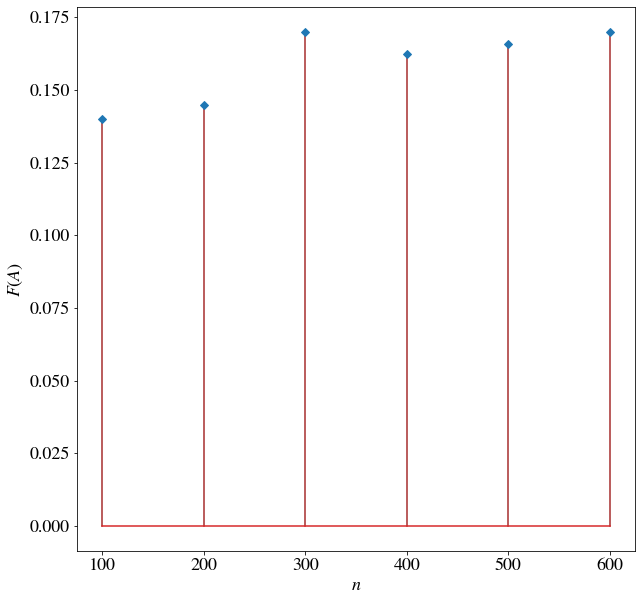

In [7]:
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

n = np.arange(100, 700, 100)
nA = 14,29,51,65,83,102
f = nA/n

fig = pyplot.figure(figsize=(10,10))
pyplot.stem(n, f, linefmt='brown', markerfmt='D')
pyplot.xlabel('$n$')
pyplot.ylabel('$F(A)$')
pyplot.show()

Observen que ha medida que aumenta $n$, se estabiliza la frecuencia relativa. Lo anterior se llama **regularidad estadística**, el cual permite hacer predicciones que eliminan, aunque sea parcial, la incertidumbre en los fenómenos impredecibles. Sin embargo, el valor de $f(A)$ alrededor del cual se está estabilizando la frecuencia relativa de *un evento*, indica la *posibilidad* de ocurrencia de un solo evento.

Considerando lo anterior, definimos $\mathbb{P}(A)$ como la probabilidad de un evento, que cumple las siguientes propiedades:

1.   Si $n(A) \geq 0$m entonces $0 \leq \mathbb{P}(A) \leq 1$
2.   Si $n(\Omega) = n$, entonces $\mathbb{P}(\Omega) = 1$
3.   Si $A$ y $B$ son dos eventos excluyentes, entonces $n(A \cup B) = n(A) + n(B)$ y por consiguiente, $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$
4.   Si consideramos un conjunto de eventos mutuamente excluyentes, $A_1, \ldots, A_i, \ldots, A_N$, entonces:

$$\mathbb{P}\left( \bigcup_{i=1}^N A_i \right) = \sum_{i=1}^N \mathbb{P}(A_i)$$

5.   El complemento de la probabilidad de un evento $A$:

$$\mathbb{P}(A^c) = 1 - \mathbb{P}(A)$$



## Espacio de Probabilidad Laplaciano

Es un caso de probabilidad donde el experimento aleatorio tiene un número finito de posibles resultados, donde cada uno tiene la misma probabilidad de ocurrencia de un evento.

$$\mathbb{P} = \frac{n(A)}{n(\Omega)}$$

donde $n(A)$ es el número de casos favorables y $n(\Omega)$ es el número de casos posibles. 

Veamos algunos ejemplos prácticos

In [8]:
# Caso de la lotería
# Cuál es la probabilidad de ganarse la lotería de Medellín, si se compra un solo billete?

import numpy as np

nA = 1 # Un evento que acierte el número ganador
nO = 1e7 # Número de eventos de posibles aciertos
P = nA/nO
print("La probabilidad de ganar la lotería de Medellin es = {:.9f}".format(P))
print("Porcentaje de acierto (lenguaje del común) = {:.9f}%".format(P*100))

La probabilidad de ganar la lotería de Medellin es = 0.000000100
Porcentaje de acierto (lenguaje del común) = 0.000010000%


In [9]:
# Caso del Baloto (Versión Anterior)
# Cúal es la probabilidad de ganar el baloto si debo elegir 6 números en cualquier orden y tenemos 45 posibles números

import numpy as np
import math

nA = 1 # Un evento que acierte el baloto
n45 = 45
n6 = 6
nO = math.factorial(45)/(math.factorial(6)*(math.factorial(45 - 6))) # Usando la fórmula de la binomial (será útil para temas posteriores)
P = nA/nO
print("La probabilidad de ganar el baloto es = {:.9f}".format(P))
print("Porcentaje de acierto (lenguaje del común) = {:.9f}%".format(P*100))

La probabilidad de ganar el baloto es = 0.000000123
Porcentaje de acierto (lenguaje del común) = 0.000012277%


## Probabilidad Marginal

La probabilidad marginal es una representación de un evento ocurrido, $\mathbb{A}$, que no esta condicionado a otro evento diferente. 

*Por ejemplo*, consideremos la probabilidad que una carta tenga color azul, es decir, $\mathbb{P}(A = azul) = 0.25$ o la probabilidad que la carta tenga el número 5, es decir, $\mathbb{P}(B = número) = 0.15$. Observen que es una probabilidad de un único evento y aunque $A$ y $B$ son dos eventos, cada uno son sucesos diferentes y no están condicionados uno con respecto al otro.

## Probabilidad Condicional

**Descripción Preliminar**

Muchas veces se obtiene información parcial acerca de los eventos aleatorios antes de conocer el resultado final o información apriori. Considerando esta información, se puede cambiar la estructura del espacio muestral. Supongamos que al medir la probabilidad de ocurrencia de un evento se tiene la información que el evento $A$ ya sucedio, para $n$ veces que se repite el evento, tenemos la siguiente expresión:

$$P(B\vert A) = \frac{n(A \cap B)}{n(A)} = \frac{\frac{n(A\cap B)}{n}}{\frac{n(A)}{A}}$$

*Por ejemplo*, se lanza dos dados:

$$\Omega = \lbrace (1,1), (1,2), \ldots, (6,6)\rbrace$$

Como el número de lanzamientos posibles es $n(\Omega) = 36$, Si $A = $ Evento que la suma sea $7$ sin información apriori:

$$\mathbb{P}(A) = \frac{6}{36} = \frac{1}{6}$$

Lo anterior se obtiene si se realiza el siguiente análisis:

$$1+6 = 7$$
$$6+1 = 7$$
$$3+4 = 7$$
$$4+3 = 7$$
$$5+2 = 7$$
$$2+5 = 7$$

Obseerven que hay $6$ eventos que suman igual a $7$. 

Ahora supongamos que hay un evento $B$ que dice que sale un $3$ en uno de los dos dados. Inicialmente, se tiene:

$$\Omega = \lbrace (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (1,3), (2,3), (3,3), (4,3), (5,3), (6,3) \rbrace$$

En este caso, $n(\Omega) = 12$

Como solo hay dos eventos que al salir un $3$ en uno de los dados, entonces se considera $(3,4)$ y $(4,3)$, y por consiguiente, son $2$ eventos que se presentan. Por consiguiente:

$$\mathbb{P}(A\vert B) = \frac{n(A\cap B)}{n(B)} = \frac{2}{12} = \frac{1}{6}$$

Para este caso, $n(B) = n{(\Omega)}$ y $n(A \cap B) = 2$. En este cálculo, $\mathbb{P}(A\vert B)$ significa que es la probabilidad de un evento $A$ dado que ocurra un evento $B$.

A partir de estos puntos preliminares, se define el concepto de probabilidad condicional


**Probabilidad Condicional:** Es la probabilidad de un evento $A$ dado un evento $B$ que ocurrío a priori:

$$\mathbb{P}(A\vert B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$$

o en caso contrario:

$$\mathbb{P}(B\vert A) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(A)}$$

donde $\mathbb{P}(B) > 0$ y $\mathbb{P}(A) > 0$. La probabilidad condicional cumple con las siguientes condiciones:

1.   $\mathbb{P}(A\vert A) = 1$
2.   $\mathbb{P}(A^c\vert B) = 1 - \mathbb{P}(A\vert B)$, siendo $A^c$ el complemento.
3.   $\mathbb{P}(A \cap B \vert C) = \mathbb{P}(A\vert B\cap C)\cdot \mathbb{P}(B \vert C)$
4.   $\mathbb{P}(A \cap B \cap C) = \mathbb{P}(C \vert A \cap B)\cdot \mathbb{P}(A \cap B)$

Veamos un ejemplo práctico de la cuarta propiedad de la probabilidad condicional



*Ejemplo:* Se tiene una caja con 12 bolas, de los cuales 3 son de color negro y 9 son de color azul. Se seleccionan 3 bolas de forma aleatoria sin repetir de nuevo una nueva selección. ¿Cuál es la probabilidad que la bola sea azul, la segunda bola sea también azul y la tercera bola sea negra?

In [10]:
import numpy as np

# Evento A es una bola azul
# Evento B es una bola azul
# Evento C es una bola negra

N = 12 # 12 Bolas en total
N_A = 9 # 9 bolas azul
N_N = 3 # 3 bolas negras
P_A = N_A/N # Probabilidad que salga bola de color azul en el primer intento

# Si se descarta una bola azul en el segundo intento entonces...

P_B_cond_A = (N_A - 1)/(N - 1)

# Si se descarta dos bolas para salga azul, entonces...

P_C_cond_A_cap_B = N_N/(N - 2)

Como $\mathbb{P}(B\vert A) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(A)}$, entonces se puede decir que:

$$\mathbb{P}(A \cap B) = \mathbb{P}(B\vert A)\cdot \mathbb{P}(A)$$

Por consiguiente:

$$\mathbb{P}(A \cap B \cap C) = \mathbb{P}(C \vert A \cap B)\cdot \mathbb{P}(B\vert A)\cdot \mathbb{P}(A)$$

In [5]:
P_A_cap_B_cap_C = P_C_cond_A_cap_B * P_B_cond_A * P_A
print("La probabilidad que la bola sea azul en el intento 1, azul en el intento 2 y negra en el intento 3 es = {:.3f}".format(P_A_cap_B_cap_C))

La probabilidad que la bola sea azul en el intento 1, azul en el intento 2 y negra en el intento 3 es = 0.164


## Independencia de eventos

La independencia de eventos establece una interpretación si dos eventos, $A$ y $B$, son independientes entre sí, cuando se cumpla la condición $A \cap B = \emptyset$. Si se cumple esta condición, entonces:

$$\mathbb{P}(A \cap B) = \mathbb{P}(A)\cdot \mathbb{P}(B)$$

En caso que no sean independientes ambos eventos, entonces:

$$\mathbb{P}(A \cap B) \neq \mathbb{P}(A)\cdot \mathbb{P}(B)$$

Si se presenta lo anterior, entonces $A$ y $B$ son mutuamente excluyentes pero no independientes.

**Nota:** $\mathbb{P}(A \cap B) = \mathbb{P}(A)\cdot \mathbb{P}(B)$ también se le llama **probabilidad conjunta** de dos eventos.

Veamos un ejemplo práctico.

In [11]:
# A = evento que la moneda salga cara
# B = evento que la moneda salga sello.

P_A = 0.5 # Probabilidad que salga cara.
P_B = 0.5 # Probabilidad que salga sello.

P_A_cap_B = P_A * P_B

print("Probabilidad que A y B sean independientes es = {:.3f}".format(P_A_cap_B))

Probabilidad que A y B sean independientes es = 0.250


Como la probabilidad es de $0.25$, y como se busca que $\mathbb{P}(A \cap B) = 0$, entonces $A$ y $B$ no son independientes entre sí.

## Teorema de la probabilidad total y de Bayes

El teorema de la probabilidad total permite establecer una suma de particiones del espacio muestral y de cualquier evento. En este caso, consideramos $B$ como las particiones del espacio muestral $\Omega$ y $D$ es cualquier evento:

$$\mathbb{P}(D) = \mathbb{P}(D \cap B_1) + \mathbb{P}(D \cap B_2) + \ldots + \mathbb{P}(D \cap B_i) + \ldots$$

La anterior expresión se puede presentar mediante probabilidades condicionales:

$$\mathbb{P}(D) = \mathbb{P}(D \vert B_1)\cdot\mathbb{P}(B_1) + \mathbb{P}(D \vert B_2)\cdot\mathbb{P}(B_2) + \ldots + \mathbb{P}(D \vert B_i)\cdot\mathbb{P}(B_i) + \ldots$$

Y por consiguiente, se puede reescribir la probabilidad total como:

$$\mathbb{P}(D) = \sum_{i \geq 1} \mathbb{P}(D \vert B_i)\cdot\mathbb{P}(B_i)$$

A partir de la expresión de la probabilidad total, se define el teorema de Bayes como sigue:

Considere que se conoce que un evento $D$ ya ocurrio, si se desea conocer la probabilidad que haya ocurrido en el evento de la partición $B_i$, se establece que:

$$\mathbb{P}(B_i \vert D) = \frac{\mathbb{P}(D\cap B_i)}{\mathbb{P}(D)} = \frac{\mathbb{P}(D \vert B_i)\cdot \mathbb{P}(B_i)}{\sum_{i \geq 1} \mathbb{P}(D \vert B_i)\cdot\mathbb{P}(B_i)}$$

Veamos un ejemplo práctico del teorema de Bayes.

*Ejemplo:* En una fábrica, hay tres máquinas que llamaremos $A$, $B$ y $C$ que producen el $45\%$, $30\%$ y $25\%$ del total de piezas producidas por día. Sin embargo, se estiman que los porcentajes de producción de piezas defectuosas por las tres máquinas son $3\%$, $4\%$ y $5\%$, respectivamente. Si se seleccional al azar una de las piezas y resulta defectuosa, cuál máquina tiene mayor probabilidad de generar piezas defectuosas?

In [12]:
P_A = 0.45
P_B = 0.3
P_C = 0.25

P_D_cond_A = 0.03
P_D_cond_B = 0.04
P_D_cond_C = 0.05

P_TOTAL = (P_D_cond_A * P_A) + (P_D_cond_B * P_B) + (P_D_cond_C * P_C)

P_A_cond_D = (P_D_cond_A * P_A) / P_TOTAL
P_B_cond_D = (P_D_cond_A * P_B) / P_TOTAL
P_C_cond_D = (P_D_cond_A * P_C) / P_TOTAL

print("La probabilidad de generar piezas defectuosas en la máquina A es {:.3f}".format(P_A_cond_D))
print("La probabilidad de generar piezas defectuosas en la máquina B es {:.3f}".format(P_B_cond_D))
print("La probabilidad de generar piezas defectuosas en la máquina C es {:.3f}".format(P_C_cond_D))

La probabilidad de generar piezas defectuosas en la máquina A es 0.355
La probabilidad de generar piezas defectuosas en la máquina B es 0.237
La probabilidad de generar piezas defectuosas en la máquina C es 0.197


Por consiguiente, la máquina $A$ tiene mayor probabilidad de generar piezas defectuosas, con una probabilidad de $0.355$ ($35.5\%$ en el lenguaje común).

# Variable aleatoria

Una variable aleatoria, $X$, es una representación en un espacio de probabilidad si es una función que transforma los elementos de un conjunto de datos a valores reales.

*Ejemplo:* Consideremos el caso del lanzamiento de dos dados.

$$\Omega = \lbrace (1,1), (1,2), \ldots, ](6,6)\rbrace$$

Como cada dado tiene 6 lados, entonces el número de lanzamientos posibles es $n(\Omega) = 36$. Si $X$ es una variable aleatoria que a cada elemento del espacio muestral le da un valor de la **suma** de los dados, entonces:

$$X\lbrace (1,2) \rbrace = 3$$
$$X\lbrace (6,6) \rbrace = 12$$

Por consiguiente, podemos establecer una relación entre un evento y un valor real:

$$X\lbrace (1,1) \rbrace = 2$$
$$X\lbrace (1,2) \rbrace = 3$$
$$X\lbrace (1,3) \rbrace = 4$$
$$X\lbrace (1,4) \rbrace = 5$$
$$X\lbrace (1,5) \rbrace = 6$$
$$X\lbrace (2,1) \rbrace = 3$$
$$\vdots$$
$$X\lbrace (6,6) \rbrace = 12$$

Considerando el anterior ejemplo, nos enfocaremos con la probabilidad el concepto de la variable aleatoria. Para este propósito, analizaremos el siguiente caso basado en el ejemplo anterior:

*Ejemplo:* A partir del ejemplo anterior, si los dos dados son *independientes* entre sí, ¿Cuáles son las medidas de cada uno de estos conjuntos, $\Omega$? En virtud de la independencia entre ambos dados, la medida de cada uno es el producto de las respectivas medidas de cada elemento, es decir:

$$\mathbb{P}\lbrace (1,2) \rbrace = \mathbb{P}(\lbrace 1 \rbrace) \cdot \mathbb{P}(\lbrace 2 \rbrace) = \frac{1}{6}\cdot\frac{1}{6} = \frac{1}{36}$$

Esto quiere decir que el evento $(1,2)$ tiene una probabilidad de $\frac{1}{36}$ que ocurra si ambos dados son independientes entre sí. Ahora, con todo lo establecido, podemos hacer la siguiente pregunta: ¿Cuál es la probabilidad que la suma de los dados sea igual a siete? *Esta pregunta se puede resolver mediante el siguiente código*:

In [13]:
import numpy as np

# Recuerde que X{(i,j)} = i + j como vimos en la primera parte del ejemplo.

d = {(i,j):i+j for i in range(1,7) for j in range(1,7)}
print(d)

{(1, 1): 2, (1, 2): 3, (1, 3): 4, (1, 4): 5, (1, 5): 6, (1, 6): 7, (2, 1): 3, (2, 2): 4, (2, 3): 5, (2, 4): 6, (2, 5): 7, (2, 6): 8, (3, 1): 4, (3, 2): 5, (3, 3): 6, (3, 4): 7, (3, 5): 8, (3, 6): 9, (4, 1): 5, (4, 2): 6, (4, 3): 7, (4, 4): 8, (4, 5): 9, (4, 6): 10, (5, 1): 6, (5, 2): 7, (5, 3): 8, (5, 4): 9, (5, 5): 10, (5, 6): 11, (6, 1): 7, (6, 2): 8, (6, 3): 9, (6, 4): 10, (6, 5): 11, (6, 6): 12}


In [14]:
from collections import defaultdict

dd = defaultdict(list)
for i,j in d.items():
  dd[j].append(i)

print(dd) # agrupa los eventos que sean iguales a un número real.

defaultdict(<class 'list'>, {2: [(1, 1)], 3: [(1, 2), (2, 1)], 4: [(1, 3), (2, 2), (3, 1)], 5: [(1, 4), (2, 3), (3, 2), (4, 1)], 6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)], 7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)], 8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)], 9: [(3, 6), (4, 5), (5, 4), (6, 3)], 10: [(4, 6), (5, 5), (6, 4)], 11: [(5, 6), (6, 5)], 12: [(6, 6)]})


In [15]:
print(dd[7]) # Los eventos que son iguales a 7

[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]


Una vez que encontramos los eventos iguales a 7, se calcula la probabilidad para cada elemento. Considerando la suposición de independencia entre ambos dados, dado como la suma de los productos de las probabilidades de los elementos individuales o eventos. Como sabemos que cada resultado es igualmente probable, la probabilidad de cada término de la suma es igual a $\frac{1}{36}$. Por consiguiente, todo lo que tenemos que hacer es contar el número de elementos en la lista correspondiente en la variable $dd$ y dividirlo por $36$. 

*Por ejemplo:*

$$X\lbrace (5,6) \rbrace = 11$$
$$X\lbrace (6,5) \rbrace = 11$$

Entonces: $\mathbb{P}(11) = \mathbb{P}(5,6) + \mathbb{P}(6,5) = \frac{1}{36} + \frac{1}{36} = \frac{2}{36} = 0.055$. Esta estrategía lo podemos reproducir para los demás casos con un ciclo *for*:

In [16]:
X = {i:len(j)/36. for i,j in dd.items()}
display(X)

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

In [17]:
Sum_P = sum(X.values())
print("La suma de todas las probabilidades es = {:.3f}".format(Sum_P))

La suma de todas las probabilidades es = 1.000


¿Cuál es la probabilidad de que la mitad del producto de tres dados exceda la suma de los mismos?

In [18]:
d = {(i,j,k):((i*j*k)/2 > i+j+k) for i in range(1,7) for j in range(1,7) for k in range(1,7)}
display(d)

{(1, 1, 1): False,
 (1, 1, 2): False,
 (1, 1, 3): False,
 (1, 1, 4): False,
 (1, 1, 5): False,
 (1, 1, 6): False,
 (1, 2, 1): False,
 (1, 2, 2): False,
 (1, 2, 3): False,
 (1, 2, 4): False,
 (1, 2, 5): False,
 (1, 2, 6): False,
 (1, 3, 1): False,
 (1, 3, 2): False,
 (1, 3, 3): False,
 (1, 3, 4): False,
 (1, 3, 5): False,
 (1, 3, 6): False,
 (1, 4, 1): False,
 (1, 4, 2): False,
 (1, 4, 3): False,
 (1, 4, 4): False,
 (1, 4, 5): False,
 (1, 4, 6): True,
 (1, 5, 1): False,
 (1, 5, 2): False,
 (1, 5, 3): False,
 (1, 5, 4): False,
 (1, 5, 5): True,
 (1, 5, 6): True,
 (1, 6, 1): False,
 (1, 6, 2): False,
 (1, 6, 3): False,
 (1, 6, 4): True,
 (1, 6, 5): True,
 (1, 6, 6): True,
 (2, 1, 1): False,
 (2, 1, 2): False,
 (2, 1, 3): False,
 (2, 1, 4): False,
 (2, 1, 5): False,
 (2, 1, 6): False,
 (2, 2, 1): False,
 (2, 2, 2): False,
 (2, 2, 3): False,
 (2, 2, 4): False,
 (2, 2, 5): True,
 (2, 2, 6): True,
 (2, 3, 1): False,
 (2, 3, 2): False,
 (2, 3, 3): True,
 (2, 3, 4): True,
 (2, 3, 5): True,
 (2,

In [19]:
dd = defaultdict(list)
for i,j in d.items():
  dd[j].append(i)

display(dd) # Agrupamos los eventos que no cumplen la condicion y aquellos eventos que si cumplen con la condición: "la probabilidad de que la mitad del producto de tres dados exceda la suma de los mismos"

defaultdict(list,
            {False: [(1, 1, 1),
              (1, 1, 2),
              (1, 1, 3),
              (1, 1, 4),
              (1, 1, 5),
              (1, 1, 6),
              (1, 2, 1),
              (1, 2, 2),
              (1, 2, 3),
              (1, 2, 4),
              (1, 2, 5),
              (1, 2, 6),
              (1, 3, 1),
              (1, 3, 2),
              (1, 3, 3),
              (1, 3, 4),
              (1, 3, 5),
              (1, 3, 6),
              (1, 4, 1),
              (1, 4, 2),
              (1, 4, 3),
              (1, 4, 4),
              (1, 4, 5),
              (1, 5, 1),
              (1, 5, 2),
              (1, 5, 3),
              (1, 5, 4),
              (1, 6, 1),
              (1, 6, 2),
              (1, 6, 3),
              (2, 1, 1),
              (2, 1, 2),
              (2, 1, 3),
              (2, 1, 4),
              (2, 1, 5),
              (2, 1, 6),
              (2, 2, 1),
              (2, 2, 2),
              (2, 2, 3),


In [20]:
X = {i:len(j)/6**3 for i,j in dd.items()}
display(X)

{False: 0.37037037037037035, True: 0.6296296296296297}

El anterior resultado indica que hay una probabilidad de $0.6296$ ($62.96\%$ en el lenguaje común) que la mitad del producto de tres dados exceda la suma de los mismos 

# Esperanza de una variable aleatoria

El valor esperado o esperanza de una variable aleatoria, $\mathbb{E}\lbrack X \rbrack$, es una función de una determina distribución de probabilidad (que analizaremos más adelante) de los valores observados en una población. Si consideramos que $X$ es una variable aleatoria para una distribución continua, entonces:

$$\mathbb{E}\lbrack X \rbrack = \int_{-\infty}^{\infty} xf(x)dx$$

Para una distribución discreta, se representa como una sumatoria de los valores posibles de $X$:

$$\mathbb{E}\lbrack X \rbrack = \sum_n x_nP_n$$

Al analizar ambas ecuaciones, se observa que se determina el promedio o media de una determinada distribución de datos continuos o discretos. Por consiguiente, para una muestra de una población, la media muestral de una muestra es el valor medio observado de los datos. Si lo anterior se cumple, entonces podemos afirmar que la media muestral debería converger al valor esperado a medida que se incluyan más muestras para determinar de nuevo el valor de la media muestral.


## Varianza y Covarianza de una variable aleatoria

La variabilidad de los datos para una variable aleatoria permite conocer la varianza para un conjunto de datos, el cual esta definido como la diferencia entre la variable aleatoria $X$ y el valor esperado $\mathbb{E}\lbrack X \rbrack$:

$$\mathbb{V}\lbrack X \rbrack = \mathbb{E}\lbrack (X - \mathbb{E}\lbrack X \rbrack)^2 \rbrack = \mathbb{E}\lbrack X^2 \rbrack - (\mathbb{E}\lbrack X \rbrack)^2 = \sum_n P_n(x_n - \mathbb{E}\lbrack X\rbrack)^2$$

Por otra parte, la covarianza determina la variabilidad entre dos variables aleatorias, $X$ e $Y$, el cual se determina como:

$$\mathbb{C}\lbrack X,Y \rbrack = \mathbb{E} \lbrack (X - \mathbb{E}\lbrack X \rbrack)(Y - \mathbb{E}\lbrack Y \rbrack)\rbrack = \mathbb{E}\lbrack X,Y \rbrack - \mathbb{E}\lbrack X \rbrack \mathbb{E}\lbrack Y \rbrack$$

Teniendo en cuenta el concepto de la independencia de eventos que vimos en secciones anteriores, si $X$ e $Y$ son variables aleatorias independientes, se puede afirmar que:

$$\mathbb{C}\lbrack X,Y \rbrack = 0$$

Lo anterior significa que no hay variabilidad entre ambas variables aleatorias.

## Ejemplo de la esperanza de una variable aleatoria

In [21]:
from scipy.stats import describe
import random
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Poblacion = range(100)
Tamano_muestra = 60
X = random.sample(Poblacion, Tamano_muestra)
Valor_esperado = describe(X).mean
Varianza_esperada = describe(X).variance
print("Valor esperado y varianza = {:.3f} y {:.3f}".format(Valor_esperado, Varianza_esperada))

Valor esperado y varianza = 50.383 y 733.935


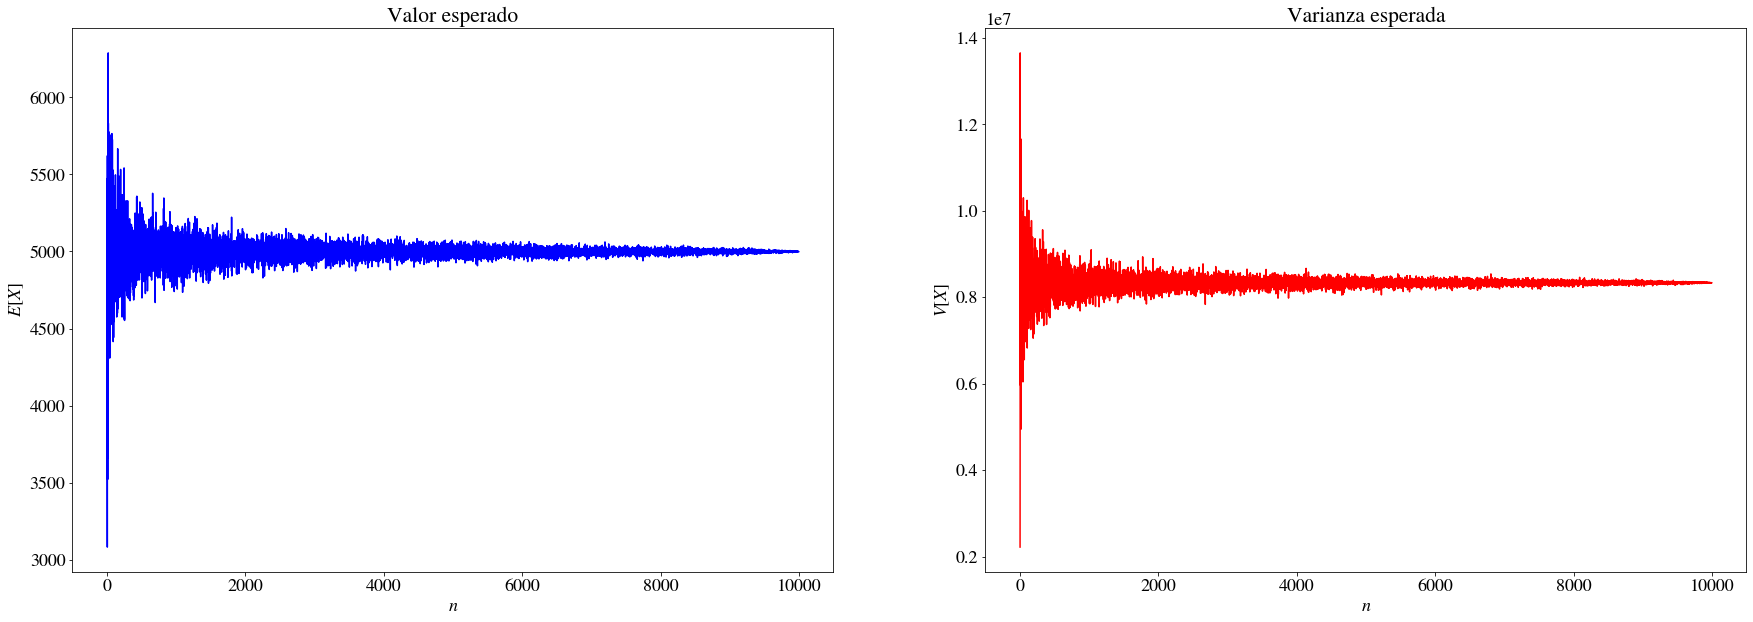

In [22]:
Poblacion = range(10000)
P = range(10000-2)
Valor_esperado = []
Varianza_esperada = []
ES = []
VS = []
Err_1 = []
Err_2 = []
Error_1 = []
Error_2 = []

for tam in P:
  X = random.sample(Poblacion, tam + 2)
  Valor_esperado = describe(X).mean
  Varianza_esperada = describe(X).variance
  ES = np.append(ES, Valor_esperado)
  VS = np.append(VS, Varianza_esperada)
  if tam > 1:
    Err_1 = (ES[tam] - ES[tam - 1])**2
    Err_2 = (VS[tam] - VS[tam - 1])**2
    Error_1 = np.append(Error_1, Err_1)
    Error_2 = np.append(Error_2, Err_2)

fig = pyplot.figure(figsize=(30,10))

ax = fig.add_subplot(1, 2, 1)
ax.plot(np.arange(0,len(ES)), ES, 'b')
pyplot.xlabel('$n$')
pyplot.ylabel('$E[X]$')
pyplot.title('Valor esperado')

ax = fig.add_subplot(1, 2, 2)
ax.plot(np.arange(0,len(VS)), VS, 'r')
pyplot.xlabel('$n$')
pyplot.ylabel('$V[X]$')
pyplot.title('Varianza esperada')
pyplot.show()

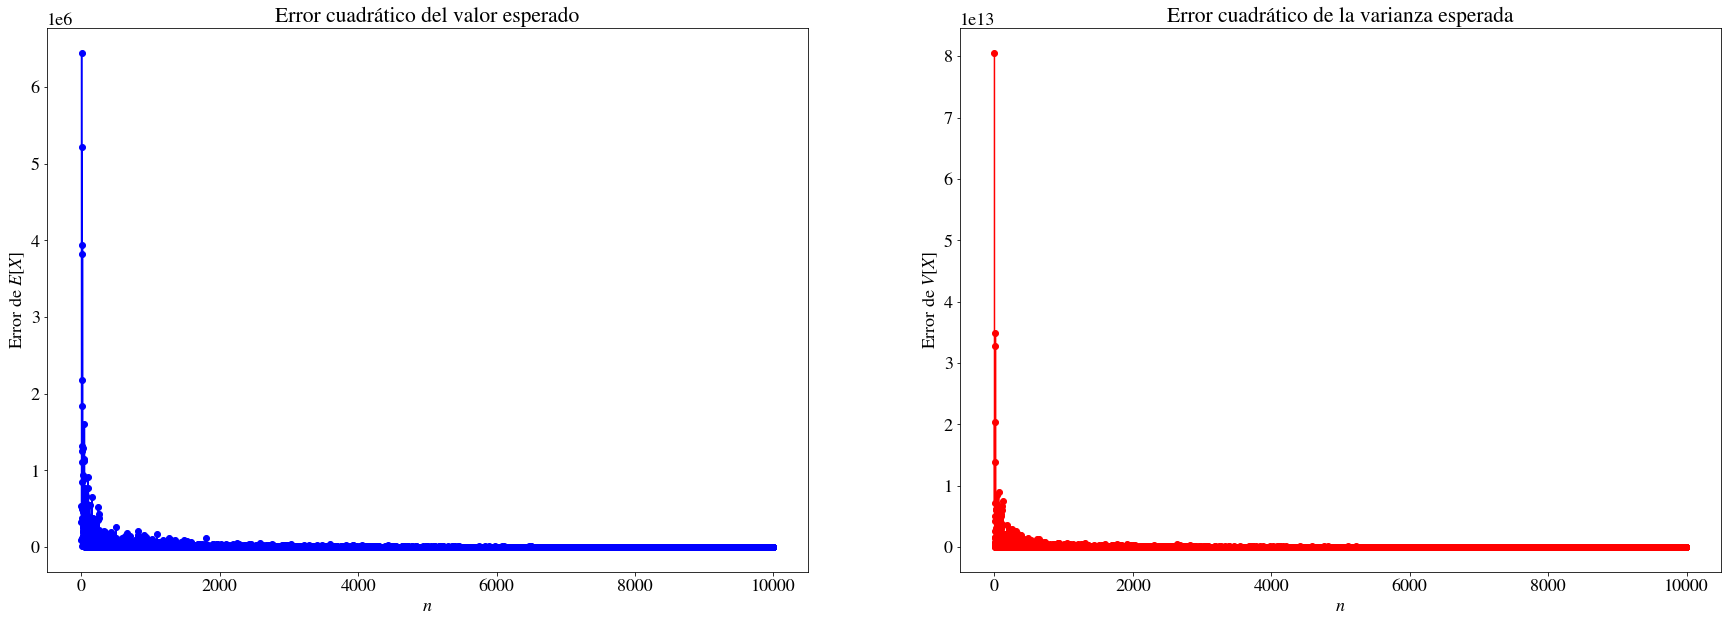

In [23]:
fig = pyplot.figure(figsize=(30,10))

ax = fig.add_subplot(1, 2, 1)
ax.plot(np.arange(0,len(Error_1)), Error_1, '-ob')
pyplot.xlabel('$n$')
pyplot.ylabel('Error de $E[X]$')
pyplot.title('Error cuadrático del valor esperado')

ax = fig.add_subplot(1, 2, 2)
ax.plot(np.arange(0,len(Error_2)), Error_2, '-or')
pyplot.xlabel('$n$')
pyplot.ylabel('Error de $V[X]$')
pyplot.title('Error cuadrático de la varianza esperada')
pyplot.show()

# Estadísticos

Primero definimos qué es un estadístico:

**Estadiístico:** son valores que resumen la información que contine una muestra completa de un conjunto de datos.

Para determina aquellos estadísticos que nos permite determinar la información de una muestra, es importante diferenciar variable continua y variable nominal.

1.   **Variable Continua:** Por lo general, son variables que pueden ser analizadas por métricas centrales como la media, la moda, la mediana, métricas de dispersión, como la varianza, la desviación estándar, y por histogramas. Las variables continuas son valores cuantitativos o numéricos como potencia, presión, etc...
2.   **Variable nominal:** son variables que pueden ser analizados por frecuencias relativas, la moda y la media y varianza de probabilidad estimada. Las variables nominales pueden ser valores discretos o categóricos.

## Estadísticos de variable continua

**Media muestral:** determina el primedio de un conjunto de valores:

$$\mu = \bar{x} = \frac{1}{N} \sum_{n=1}^N x_n$$

**Mediana:** Es el valor que deja el mismo número de sucesos a ambos lados. Es decir:

$$med(x) = x_n \vert sucesos(x_m \leq x_n) = sucesos(x_k \geq x_n)$$

A diferencia de la media, la mediana ordena el vector de valores y toma el valor central, lo cual, es menos sensible que la media muestral cuando hay valores extremos poco probables.

**Rango:** Mide la distancia entre el valor máximo y mínimo de un conjunto de datos.

$$r(x) = \max\lbrace x_1, \ldots, x_n, \ldots, x_N \rbrace - \min\lbrace x_1, \ldots, x_n, \ldots, x_N \rbrace$$

**Varianza:** es el promedio o media de las desviaciones con respecto a un valor medio muestral.

$$\sigma^2 = \frac{1}{N - 1} \sum_{n=1}^N (x_n - \mu)^2 = \frac{1}{N - 1} \left \lbrack \sum_{n=1}^N x_n^2 - N\mu^2 \right \rbrack$$

**Desviación estándar:** Es la raíz cuadrada de la varianza:

$$std(x) = \sqrt{\sigma^2}$$

In [24]:
import numpy as np

x = np.random.randn(1,50)
print(x)

[[ 1.52518911  0.00235001  1.49819806  0.97067691 -0.32299458 -2.18321545
  -0.43881647  0.07063996 -0.87583239  0.01775193  1.07042411 -0.37460181
   1.24786796  0.23967167  0.80546931  0.74825857 -0.3427804   0.89225578
  -1.28426746  0.26116301  0.34256492  0.22759564  0.68625521 -1.86908255
  -0.15265327  1.50461774 -0.52760173 -0.00463479  1.35377427  0.91709266
   0.12048794 -0.63224254 -0.38234676  0.42551075  0.12597698  0.21720476
  -0.73627982 -0.26696801 -0.58792797 -0.69926627  1.92125164 -1.57569373
   1.10066175 -1.10498506  1.08597961  0.25082826  0.39249377  1.05984043
   0.95300476 -0.41488208]]


In [25]:
print("Media de la muestra de los datos = {:.3f}".format(np.mean(x)))
print("Mediana de la muestra de los datos = {:.3f}".format(np.median(x)))
print("Varianza de la muestra de los datos = {:.3f}".format(np.var(x)))
print("Desviación estándar de la muestra de los datos = {:.3f}".format(np.std(x)))
print("Rango de la muestra de los datos = {:.3f}".format(np.max(x) - np.min(x)))

Media de la muestra de los datos = 0.145
Mediana de la muestra de los datos = 0.172
Varianza de la muestra de los datos = 0.817
Desviación estándar de la muestra de los datos = 0.904
Rango de la muestra de los datos = 4.104


*Ejemplo*: Consideremos dos conjuntos de datos, $x$, $y$, donde $x$ representa el promedio acumulado de las notas de los estudiantes de electromagnetismo e $y$ representa el promedio acumulado de las notas de los estudiantes de modelo de sistemas. Para una muestra de 20 estudiantes de los 100 estudiantes inscritos a tales asignaturas, se desea conocer si hay una diferencia entre las notas de ambas asignaturas.

In [26]:
!pip install statistics --upgrade

  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7453 sha256=ca47e8e2a1690a782e5c4262dc1edeced5d4e6a279248013c6e23f5919330b22
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built statistics


In [27]:
from statistics import mean
from random import shuffle
import numpy as np

electro = [3.2, 2.1, 4.5, 3.0, 2.94, 2.5, 3.7, 4.1, 2.2]
modelos = [3.1, 5.0, 4.5, 4.4, 3.5, 2.7, 3.3, 3.9, 4.7, 4.0, 3.3, 2.0]

media_electro = mean(electro)
media_modelos = mean(modelos)

diferencia = media_electro - media_modelos

N = 20
contador = 0
suma_notas = np.sum(np.asarray([electro, modelos]),axis=0)

for n in range(N):
  shuffle(suma_notas)
  diferencia_seleccionada = mean(suma_notas[:len(electro)]) - mean(suma_notas[:len(modelos)])
  contador += (diferencia_seleccionada >= diferencia)

print("Número de conteos con una diferencia es {:.3f}".format(contador))
print("Diferencia conocida de las notas es {:.3f}".format(diferencia))
print("El valor de la diferencia entre conteo es {:.3f}".format(contador/N))  

Número de conteos con una diferencia es 20.000
Diferencia conocida de las notas es -0.562
El valor de la diferencia entre conteo es 1.000


## Histograma

El histograma es una representación gráfica que muestra la distribución de probabilidad de una variable a lo largo de su recorrido, mediante la frecuencia de aparición de datos a lo largo del recorrido de la variable. Es importante considerar que la frecuencia de aparición dependerá del intervalo que se estime, mediante el valor mínimo y máximo de la variable. Por otra parte, la suma total de frecuencias de aparición o *absoluta* es el número de datos y si se trabaja con frecuencias *relativas*, la suma total será 1.

Dentro de los histogramas, una de las representaciones más comunes es el **histograma acumulado** que representa la suma de frecuencias relativas de casos inferiores al valor en abscisas, es decir, la acumulación de un histograma normalizado entre 0 y 1. 

En un histograma, hay cuatro valores que se pueden extraer como información de los datos:

1.   **Cuartil:** son valores que dividen el recorrido de los datos en particiones, que los llamaremos $c$, donde cada partición tiene la misma frecuencia. Matemáticamente, el cuaril se calcula como:

$$c = \frac{\max_n\lbrace x_1,\ldots,x_N \rbrace - \min_n\lbrace x_1,\ldots,x_N \rbrace}{h}$$

siendo $h$ el ancho de las particiones. Otra forma alternativa para calcular el cuartil es con la fórmula de Sturges, que se expresa como:

$$c = (\log_2 N) + 1$$
  
Así mismo, hay otras alternativas como la regla de referencia normal de Scott o la regla de Freedman-Diaconis.

2.   **Percentil:** es el valor que esta por debajo de un porcentaje de muestras de los datos. Este valor se calcula si entramos en el eje vertical del histograma y se lee el valor correspondiente en el eje horizontal.
3.   **Percentil 50:** es el valor de la mediana de los datos.
4.   **Percentiles 25 y 75 cuartiles:** es el $50\%$ de las muestras de los datos. En algunos libros de estadística lo llaman recorrido intercuartílico.

Veamos un ejemplo práctico de un histograma.

In [28]:
from sklearn.datasets import load_wine # Base de datos de clases de vino
import pandas as pd # librería para análisis de datos

datos = load_wine()
data = datos.data
X = data[:,0:2]
nombres = ['fixed acidity', 'volatile acidity']
data_comp = pd.DataFrame(X, columns = nombres)
display(data_comp)

,fixed acidity,volatile acidity
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [29]:
# Calculando los cuartiles
data_comp.quantile([0, 0.25, 0.5, 0.75, 1])

,fixed acidity,volatile acidity
0.00,11.0300,0.7400
0.25,12.3625,1.6025
0.50,13.0500,1.8650
0.75,13.6775,3.0825
1.00,14.8300,5.8000


In [30]:
# Calculando los estadísticos principales de los datos
data_comp.describe()

,fixed acidity,volatile acidity
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


In [31]:
# Calculando la mediana de los datos
data_comp.median()

fixed acidity       13.050
volatile acidity     1.865
dtype: float64

In [32]:
# Calculando la varianza de los datos
data_comp.var()

fixed acidity       0.659062
volatile acidity    1.248015
dtype: float64

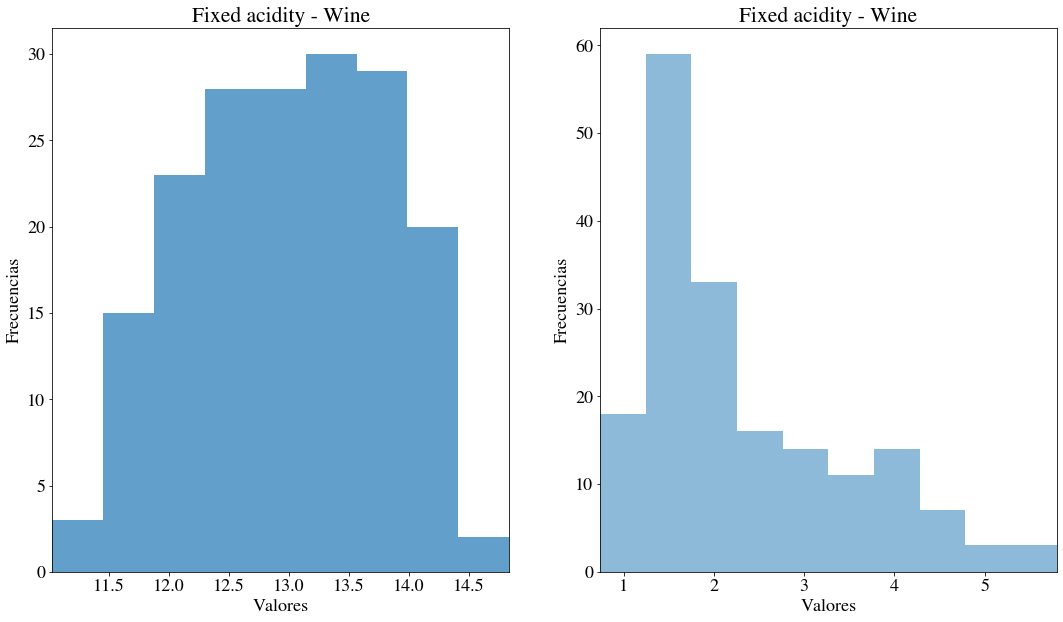

In [33]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'fd', alpha=0.7) # fd = regla de Freedman-Diaconis
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'fd', alpha=0.5) # fd = regla de Freedman-Diaconis
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
pyplot.show()

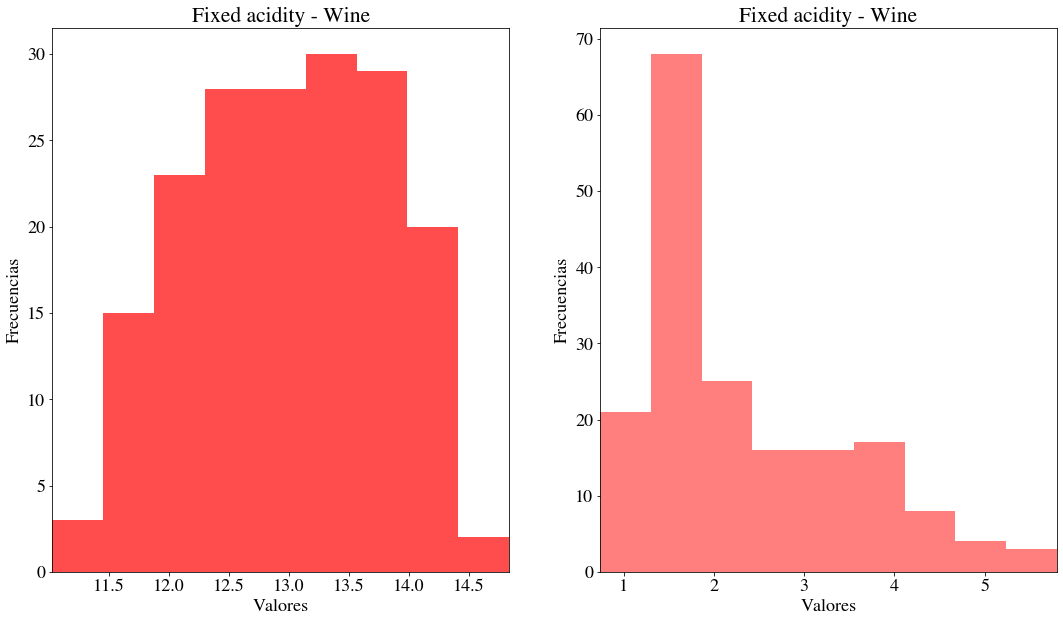

In [34]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'sturges', alpha=0.7, color = 'r') # sturges
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'sturges', alpha=0.5, color = 'r') # sturges
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
pyplot.show()

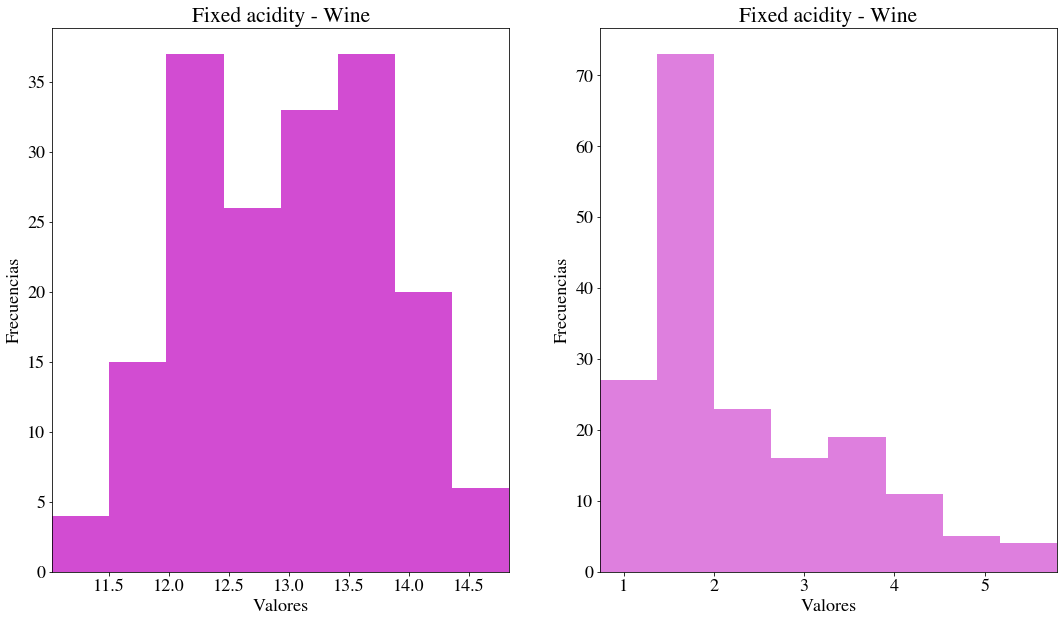

In [35]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'scott', alpha=0.7, color = 'm') # scott
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'scott', alpha=0.5, color = 'm') # scott
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
pyplot.show()

 Que sucede si se utiliza el parámetro *density* 

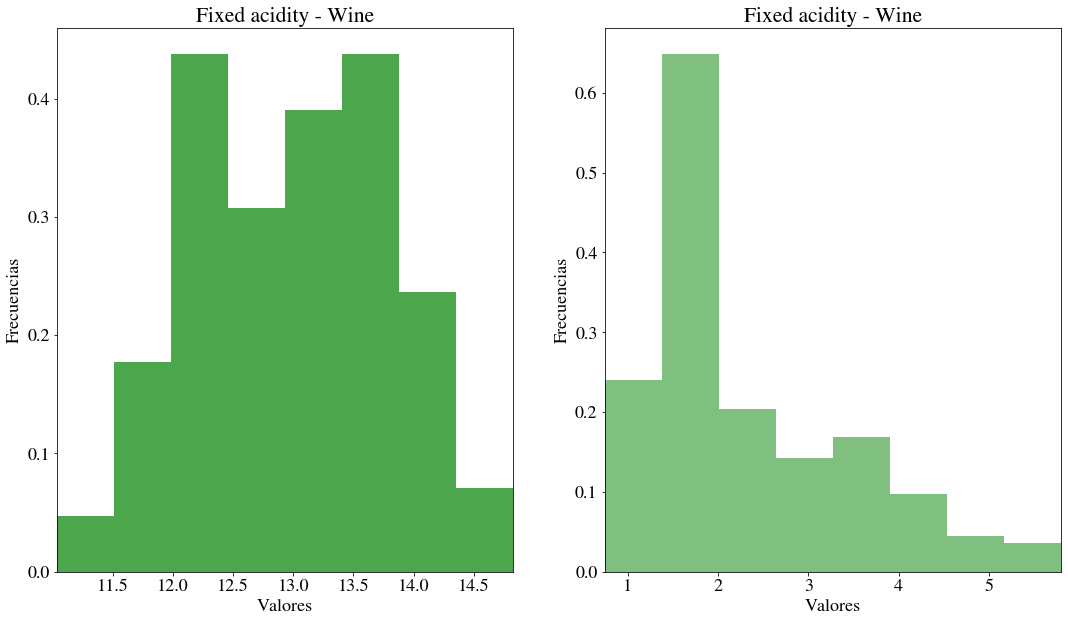

In [36]:
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(18,10))
ax = fig.add_subplot(1, 2, 1)
pyplot.hist(data_comp['fixed acidity'], bins = 'scott', density = True, alpha=0.7, color = 'g') # scott
pyplot.xlim(data_comp['fixed acidity'].min(),data_comp['fixed acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
ax = fig.add_subplot(1, 2, 2)
pyplot.hist(data_comp['volatile acidity'], bins = 'scott', density = True, alpha=0.5, color = 'g') # scott
pyplot.xlim(data_comp['volatile acidity'].min(),data_comp['volatile acidity'].max())
pyplot.xlabel('Valores')
pyplot.ylabel('Frecuencias')
pyplot.title('Fixed acidity - Wine')
pyplot.show()

## Estadísticos de variable nominal o categórica

Consideremos un conjunto de valores dicretos, $\lbrace v_1,\ldots, v_N \rbrace$, tal que podemos caracterizar el número de veces que en la muestra de $N$ datos aparece cada valor, $\lbrace n_1, \ldots, n_K\rbrace$, donde:

$$N = \sum_{j=1}^k n_j$$

Lo anterior indica que la suma total del número de veces que aparece uno o más valores discretos es igual al número total de muestras de los datos. Teniendo en cuenta esta característica, los estadísticos de una variable nominal $V$ son las siguientes:

**Moda:** Es el valor que aparece más veces en un conjunto de datos discretos.

$$v_j = arg\max_j\lbrace n_1, \ldots, n_j, \ldots. n_k \rbrace$$

**Media Nominal:** Es un valor que para una variable nominal dada, se obtiene para $m$ casos o sucesos observados en $N$ datos:

$$\rho = \frac{m}{N}$$

Una forma alternativa para representar $\rho$ es mediante una expresión que asigna una variable binaria con cada ejemplo de un conjunto datos:

$$\rho = \frac{1}{N}\sum_{i=1}^N v_i$$

donde $v_i = 1$ si hay correspondencia en una categoría y $v_i = 0$ en otro caso.

**Varianza Nominal:** Es un valor que estima la varianza de cada categoría:

$$\sigma^2(\rho) = \frac{1}{N}\sum_{i=1}^N (v_i - \rho) = \rho(1 - \rho)$$

Como caso curioso, si $\rho = 0.5$ entonces se obtiene la máxima varianza nominal y se puede estimar $\rho = \frac{1}{k}$, siendo $k$ es el númerop de valores que toma la variable nominal.

**Desviación estándar nominal:** Es un valor de la desviación de cada categoría:

$$\sigma(\rho) = \sqrt{\rho(1 - \rho)}$$

**Histograma para variable nominal**: Para crear una representación gráfica del histograma con variable nominal, se calcula la distribución de frecuencias de los valores en $N$ datos de for porcentual:

$$P_1 = 100\left ( \frac{n_1}{N} \right)\%;\ldots; P_k = 100\left ( \frac{n_k}{N} \right)\%$$

Por consiguiente, cada $P_1 \ldots, P_K$ tiene un valor porcentual por cada categoría.

In [37]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib

datos = sns.load_dataset("tips")
datos = datos.loc[:,['sex', 'smoker', 'day', 'time', 'size']]
display(datos)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


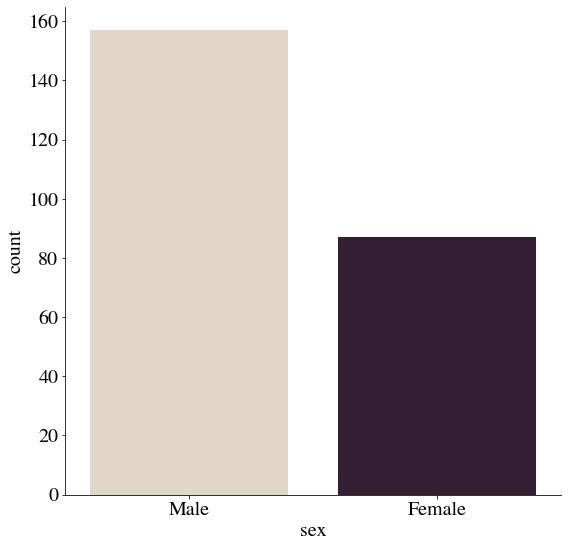

In [38]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="sex", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

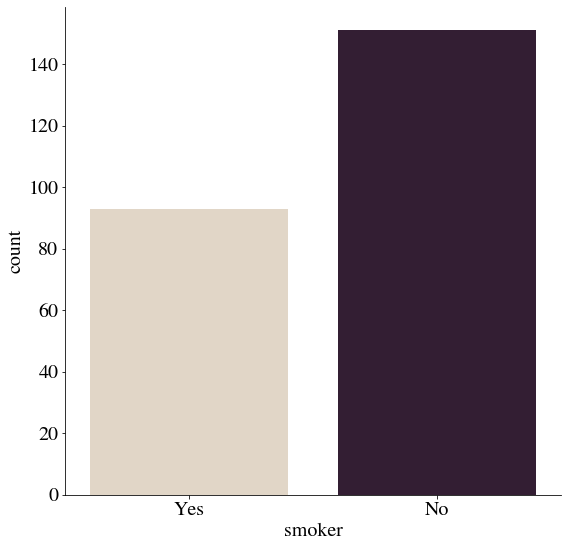

In [39]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="smoker", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

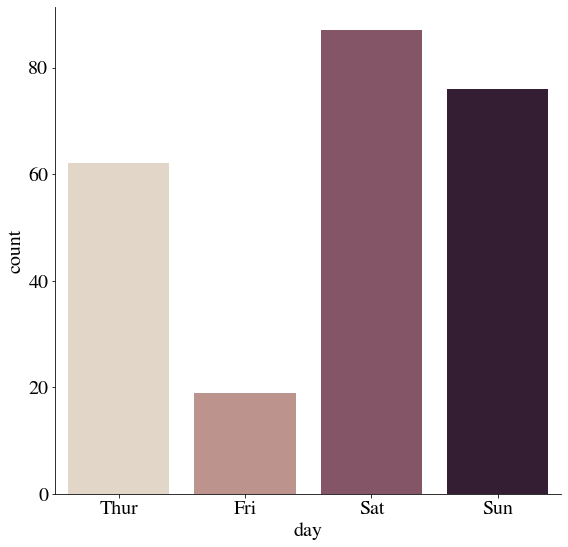

In [40]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="day", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

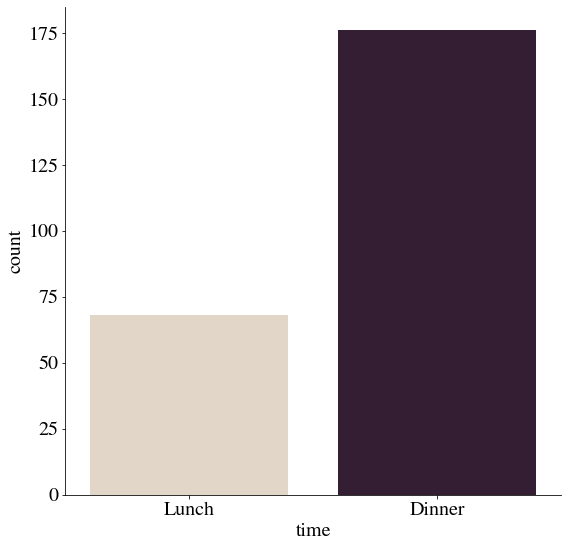

In [41]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="time", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

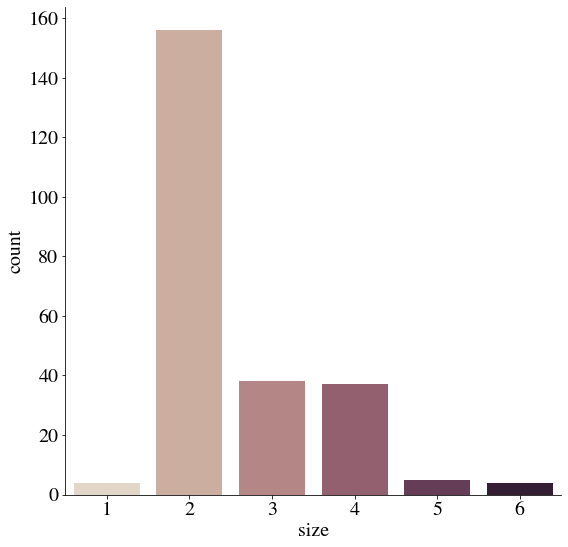

In [42]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="size", kind="count", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

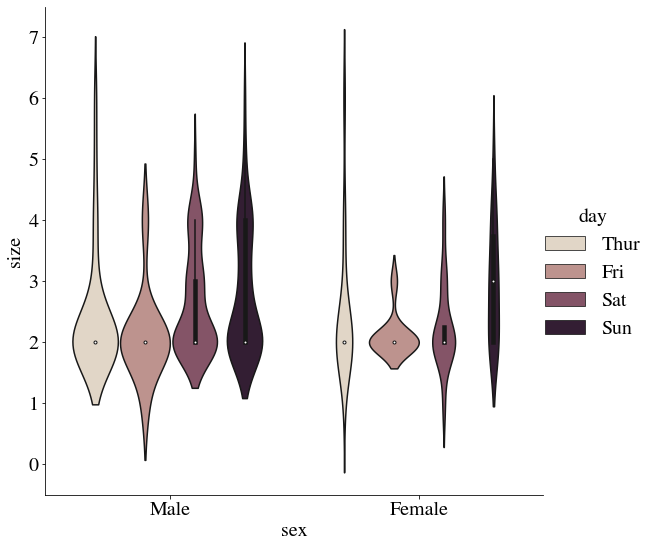

In [43]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
sns.catplot(x="sex", y = "size", hue="day", kind="violin", palette="ch:.25", data = datos, height = 8, aspect = 1)
pyplot.show()

In [44]:
import numpy as np

a = datos['sex'].value_counts(normalize = False)
m = datos.shape[0]
print("Muestras por cada categoría para una variable nominal = \n", a)
print("Número de datos = ", m)
media_nominal = a/m
varianza_nominal = media_nominal*(1 - media_nominal)
desd_nominal = np.sqrt(varianza_nominal)
print("Media nominal = \n",media_nominal)
print("Varianza nominal = \n",varianza_nominal)
print("Desviación nominal = \n",desd_nominal)

Muestras por cada categoría para una variable nominal = 
 Male      157
Female     87
Name: sex, dtype: int64
Número de datos =  244
Media nominal = 
 Male      0.643443
Female    0.356557
Name: sex, dtype: float64
Varianza nominal = 
 Male      0.229424
Female    0.229424
Name: sex, dtype: float64
Desviación nominal = 
 Male      0.478982
Female    0.478982
Name: sex, dtype: float64


In [45]:
d = datos.loc[:,['sex','smoker']]
L1 = d.loc[(d['sex'] == 'Male') & (d['smoker'] == 'Yes')]
L2 = d.loc[(d['sex'] == 'Female') & (d['smoker'] == 'Yes')]
n1 = L1.shape[0]
n2 = L2.shape[0]
m = datos.shape[0]
media_1 = n1/m
media_2 = n2/m
var_1 = media_1*(1 - media_1)
var_2 = media_2*(1 - media_2)
des_1 = np.sqrt(var_1)
des_2 = np.sqrt(var_2)
print("Media nominal hombres que fuman = {:.3f}".format(media_1))
print("Media nominal mujeres que fuman = {:.3f}".format(media_2))
print("Varianza nominal hombres que fuman = {:.3f}".format(var_1))
print("Varianza nominal mujeres que fuman = {:.3f}".format(var_2))
print("Desviación nominal hombres que fuman = {:.3f}".format(des_1))
print("Desviación nominal mujeres que fuman = {:.3f}".format(des_2))

Media nominal hombres que fuman = 0.246
Media nominal mujeres que fuman = 0.135
Varianza nominal hombres que fuman = 0.185
Varianza nominal mujeres que fuman = 0.117
Desviación nominal hombres que fuman = 0.431
Desviación nominal mujeres que fuman = 0.342


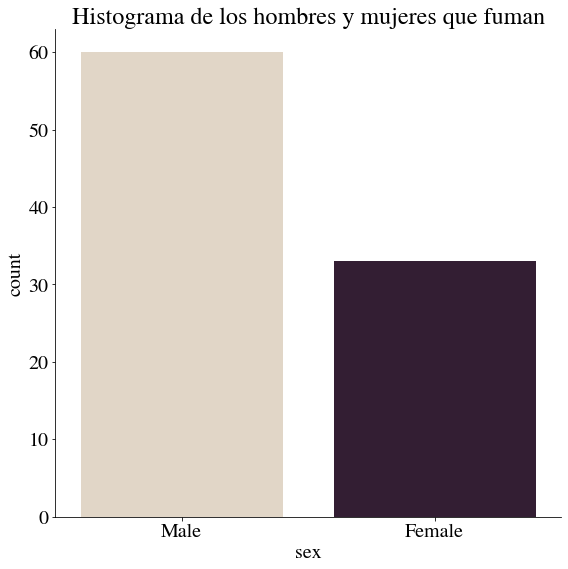

In [46]:
import pandas as pd

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
DATA = np.vstack([L1,L2]) # Unificar los conjuntos de datos L1 y L2
data_new = pd.DataFrame(DATA, columns = ['sex','smoker'])
sns.catplot(x="sex", kind="count", palette="ch:.25", data = data_new, height = 8, aspect = 1)
pyplot.title("Histograma de los hombres y mujeres que fuman")
pyplot.show()

# Función de distribución

Una función de distribución de probabilidad se establece como una relación una variable aleatoria $X$ , tal que:

$$F(X) = F_X(x) = \mathbb{P}(X \leq x)$$

donde $x$ es un valor que pertenece a $X$. Esta función cumple con tres propiedades:

1.   $\lim_{X \rightarrow -\infty} F(X) = 0$
2.   $\lim_{X \rightarrow \infty} F(X) = 1$
3.   $F(X)$ es una función creciente si $F(X) \leq F(x)$

A partir de lo anterior, se puede analizar el siguiente ejemplo:

Se lanza una moneda dos veces. Si $X$ es el número de caras obtenidas en dos lanzamientos, se considera que:

*   $s$ es un sello de la moneda.
*   $c$ es la cara de la moneda.
*   $\Omega$ es el espacio de las muestras, dado para este ejemplo como:

$$\Omega = \lbrace (c,c),(c,s),(s,c), (s,s) \rbrace$$

El estado $(s,s)$ se representa como $0$, $(c,s)$ y $(s,c)$ como $1$ y $(c,c)$ como $2$. A partir de lo anterior, se define una variable aleatoria $X = \lbrace 0,1,2 \rbrace$. Por consiguiente:

$$P(X = 0) = \frac{1}{4}$$
$$P(X = 1) = \frac{1}{2}$$
$$P(X = 2) = \frac{1}{4}$$
$$\sum_{n=0}^2 P(X_n) = \frac{1}{4} + \frac{1}{2} + \frac{1}{4} = 1$$

Al determinar la función de probabilidad, encontramos que:

$$F(0) = \mathbb{P}(X \leq 0) = \mathbb{P}(X = 0) = \frac{1}{4}$$
$$F(0.5) = \mathbb{P}(X \leq 0.5) = \mathbb{P}(X = 0.5) = \frac{1}{4}$$
$$F(1) = \mathbb{P}(X \leq 1) = \mathbb{P}(X = 0) + \mathbb{P}(X = 1) = \frac{1}{4} + \frac{1}{2} = \frac{3}{4}$$
$$F(1.5) = \mathbb{P}(X \leq 1.5) = \mathbb{P}(X = 0) + \mathbb{P}(X = 1.5) = \frac{1}{4} + \frac{1}{2} = \frac{3}{4}$$
$$F(2) = \mathbb{P}(X \leq 2) = \mathbb{P}(X = 0) + \mathbb{P}(X = 1) + \mathbb{P}(X = 2) = \frac{1}{4} + \frac{1}{2} + \frac{1}{4} = 1$$

Considerando estos cálculos, la función de distribución se define como:

$$F(x) = \begin{cases} 0 & Si\,\, x < 0\\
\frac{1}{4} & Si\,\, 0 \leq x < 1\\
\frac{3}{4} & Si\,\, 1 \leq x < 2\\
1 & Si\,\, x \geq 2\end{cases}$$

Veamos un ejemplo práctico en Python.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


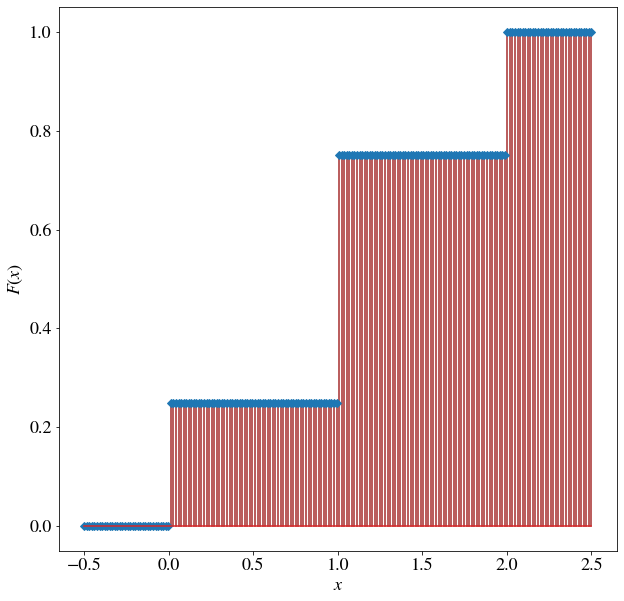

In [47]:
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.linspace(-0.5,2.5,200)

f = []

for n in range(len(x)):
  if x[n] < 0:
    f.append(0)
  elif x[n] >= 0 and x[n] < 1:
    f.append(0.25)
  elif x[n] >= 1 and x[n] < 2:
    f.append(0.75)
  elif x[n] >= 2:
    f.append(1)

pyplot.figure(figsize=(10,10))
pyplot.stem(x, f, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$F(x)$')
pyplot.show()

#Momentos estadísticos

Los momentos estadísticos son conjuntos de parámetros estadísticos que miden una determinada distribución de probabilidad. Por lo general, hay cuatro momentos que se analizan en una distribución:

1.   **Primer Momento:** La media
2.   **Segundo Momento:** La varianza
3.   **Tercer Momento:** El sesgo. Este parámetro mide la asimentría de una distribución desde su pico, lo cual permite describir la forma de la distribución. Por lo general, si el sesgo es positivo, significa que la media es más grande que la mediana y la distribución tendra un pico con los valores más altos de probabilidad. Por el contrario, si el sesgo es negativo, entonces la media es más pequeña que la mediana y la distribución tendra un pico con los valores más bajos de probabilidad. El sesgo se determina como:

$$s = \frac{media - mediana}{desviacion}$$

4.  **Cuarto Momento:** La Curtosis. Este parámetro mide el pico de una distribución. Si la curtosis es positiva, entonces la distribución tendrá una forma delgada y puntiaguda. Si la curtosis es negativa, entonces la distribución tendrá una forma plana y amplia.

Es importante resaltar que estos momentos de las distribución pueden diferir su comportamiento de acuerdo a los parámetros propios de cada distribución de probabilidad que analizaremos más adelante. 



# Funciones de distribución discreta

## Función de distribución uniforme discreta

La función de distribución uniforme discreta, $X \sim Unid(L,H)$, es la función de distribución discreta más sencilla donde relaciona puntos extremos máximos y mínimos de la variable aleatoria $X$. De acuerdo al rango entre ambos extremos, entre más amplio su rango, los valores de probabilidad disminuye y se incrementa en caso contrario. Matemáticamente se define como:

$$P(x\vert L,H) = \frac{1}{H - L}$$

siendo $L$ y $H$ los extremos menor y superior.

La media y la varianza de esta distribución está dado por:

$$\mu = \frac{L + H}{2}$$

$$\sigma^2 = \frac{(H-L+1)^2 - 1}{12}$$

Veamos un ejemplo práctico de esta distribución.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

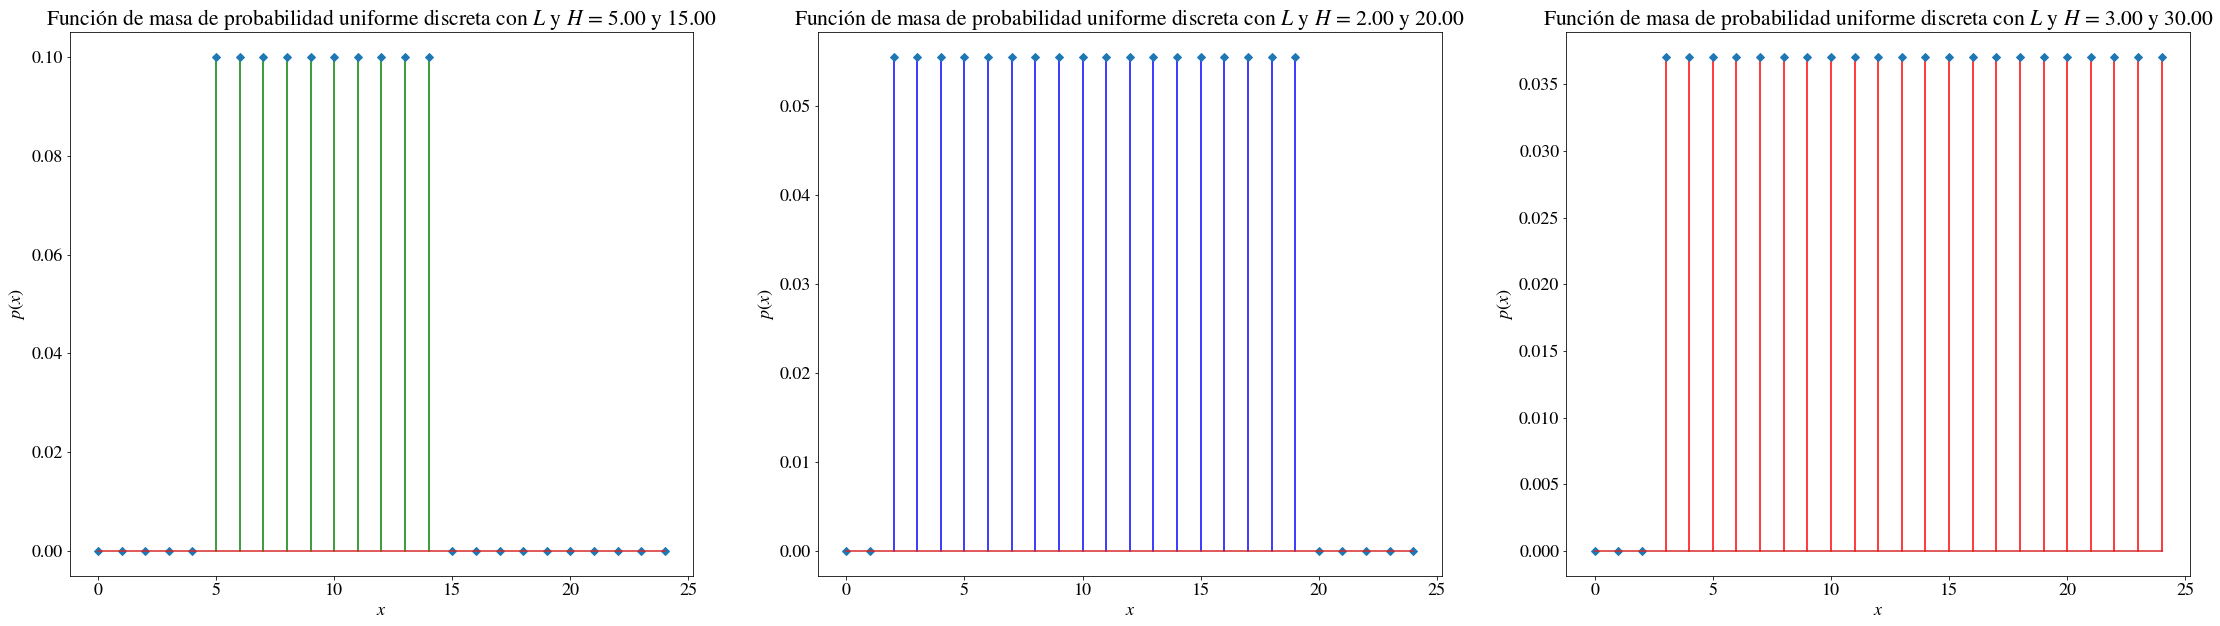

Los valores de la media son = 9.500, 10.500 y 16.000
Los valores de la varianza son = 8.250, 26.917 y 60.667


In [48]:
import numpy as np
from scipy.stats import randint
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

L_1,H_1 = 5,15
L_2,H_2 = 2,20
L_3,H_3 = 3,30
media_1, varianza_1,_ ,_ = randint.stats(L_1, H_1, moments='mvsk')
media_2, varianza_2,_ ,_ = randint.stats(L_2, H_2, moments='mvsk')
media_3, varianza_3,_ ,_ = randint.stats(L_3, H_3, moments='mvsk')
x = np.arange(25)

P1 = randint.pmf(x, L_1, H_1)
P2 = randint.pmf(x, L_2, H_2)
P3 = randint.pmf(x, L_3, H_3)

fig = pyplot.figure(figsize=(38,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad uniforme discreta con $L$ y $H$ = {:.2f} y {:.2f}'.format(L_1,H_1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad uniforme discreta con $L$ y $H$ = {:.2f} y {:.2f}'.format(L_2,H_2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad uniforme discreta con $L$ y $H$ = {:.2f} y {:.2f}'.format(L_3,H_3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

## Función de distribución Bernoulli

La función de distribución Bernoulli, $X \sim Ber(\rho)$, es una distribución con dos estados, como sucede, por ejemplo, en el lanzamiento de una moneda. Si lanzamos una moneda (y la moneda no está amañada), la probabilidad que salga "cara" es $\rho_{cara} = 0.5$. Y como tiene que ser cara o sello, obtenemos:

$$P(x\vert \rho) = \begin{cases} 1 - \rho & x=0 \\
\rho & x = 1\end{cases}$$

where:

*   $\sim$ significa "es distribuido de acuerdo a"
*   $1 - \rho$ es el complemento de $\rho$, por ejemplo, la probabilidad que salga "sello", $\rho_{sello} = 1 - \rho_{cara}$
*   $\rho_{sello} + \rho_{cara} = 1$

Veamos un ejemplo práctico.

In [49]:
from scipy.stats import bernoulli

p = 0.5
PX = bernoulli(p)
PX

Lo anterior se llama función de distribución congelado o frozen, que es una opción de Python que permite calcular cualquier valor de una distribución, para este caso, como es una distribución Bernoulli, analizamos que sucede si $x = 0$ y $x = 1$, tal y como se mencionó en la fórmula de la función de distribución Bernoulli.

In [50]:
x = [0,1]
p_sello = PX.pmf(x[0])
p_cara = PX.pmf(x[1])
print("La probabilidad de caer sello es: {:.3f}".format(p_sello))
print("La probabilidad de caer cara es: {:.3f}".format(p_cara))

La probabilidad de caer sello es: 0.500
La probabilidad de caer cara es: 0.500


La función pmf significa *función de masa de probabilidad*. Ahora veamos el gráfico de esta distribución

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


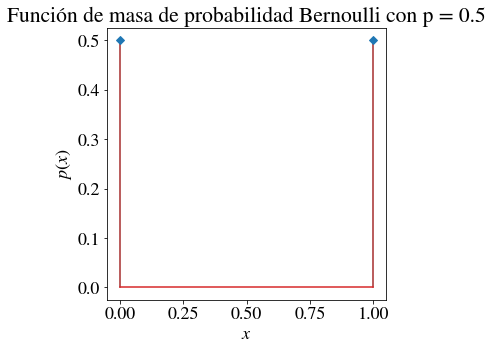

In [51]:
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

pyplot.figure(figsize=(5,5))
pyplot.stem(x, [p_sello,p_cara], linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Bernoulli con p = {:.1f}'.format(p))
pyplot.show()

In [52]:
sellos = PX.rvs(15)
sellos

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

La función rvs significa variaciones aleatorias y se utiliza para generar una secuencia aleatoria de valores entre 0 y 1.

## Función de distribución Binomial

La función de distribución binomial, $X \sim Bin(n,p)$, es una distribución que determina la probabilidad que un número determinado de *ensayos* o *pruebas* son probables casos de éxito o de fracaso. Por ejemplo consideremos las siguientes interrogantes:

*   De cada diez lanzamientos, ¿cuántas veces la moneda aterrizará con cara?
*   De los niños nacidos en un hospital determinado en un día determinado, ¿cuántos de ellos serán niñas?
*   ¿Cuántos estudiantes en un aula determinada tendrán ojos verdes?
*   ¿Cuántos mosquitos, de un enjambre, morirán cuando se les rocíe con insecticida?

Para responder a este tipo de interrogantes, consideramos $n$ como el número de experimentos repetitivos donde la probabilidad de éxito está dado por el parámetro $rho$ y la suma del número de éxitos. Este número de éxitos está representado por la variable aleatoria $X$ tal que $X = \lbrace 0,\ldots, n \rbrace$. Por consiguiente, definimos la función de masa de probabilidad, $P(x = k \vert n,\rho)$, como:

$$P(x = k \vert n,\rho) = \begin{cases} \binom{n}{k} \rho^k (1-\rho)^{n-k} & 0 \leq \rho \leq 1,\,\, n \in \mathbb{N} \\
0 & otro\,\, caso \end{cases}$$

donde:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

Esta función cumple con la condición de la probabilidad total:

$$p_0 + \ldots + p_{n-1} = \sum_{i=0}^{n-1} p_i = 1$$

La media y la varianza de esta distribución están dados por:

$$\mu = n\rho$$

$$\sigma^2 = n\rho(1-\rho)$$

Veamos un ejemplo práctio de esta función.

La media es 7.500
La varianza es 3.750


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


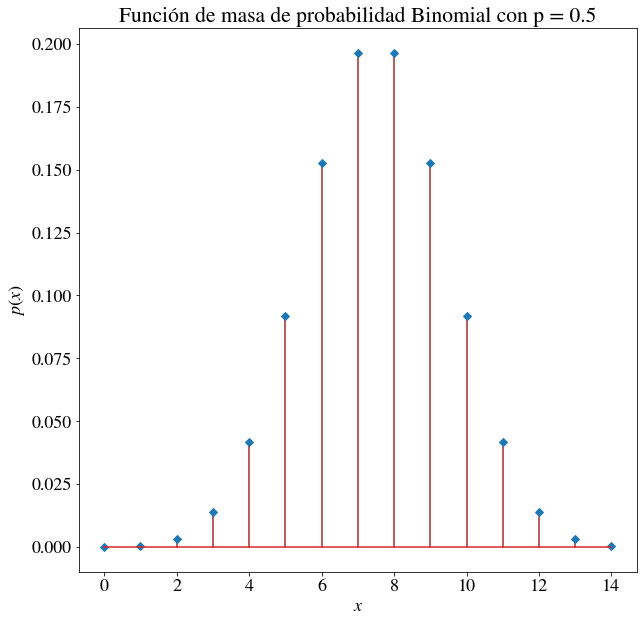

In [53]:
from scipy.stats import binom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

p, n = 0.5, 15
BIN = binom(n, p)
x = np.arange(15)
P = BIN.pmf(x)
media, varianza, _, _ = binom.stats(n, p, moments='mvsk')

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.1f}'.format(p))
pyplot.show()

Qué sucedería en la función de distribución para diferentes valores de $\rho$?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

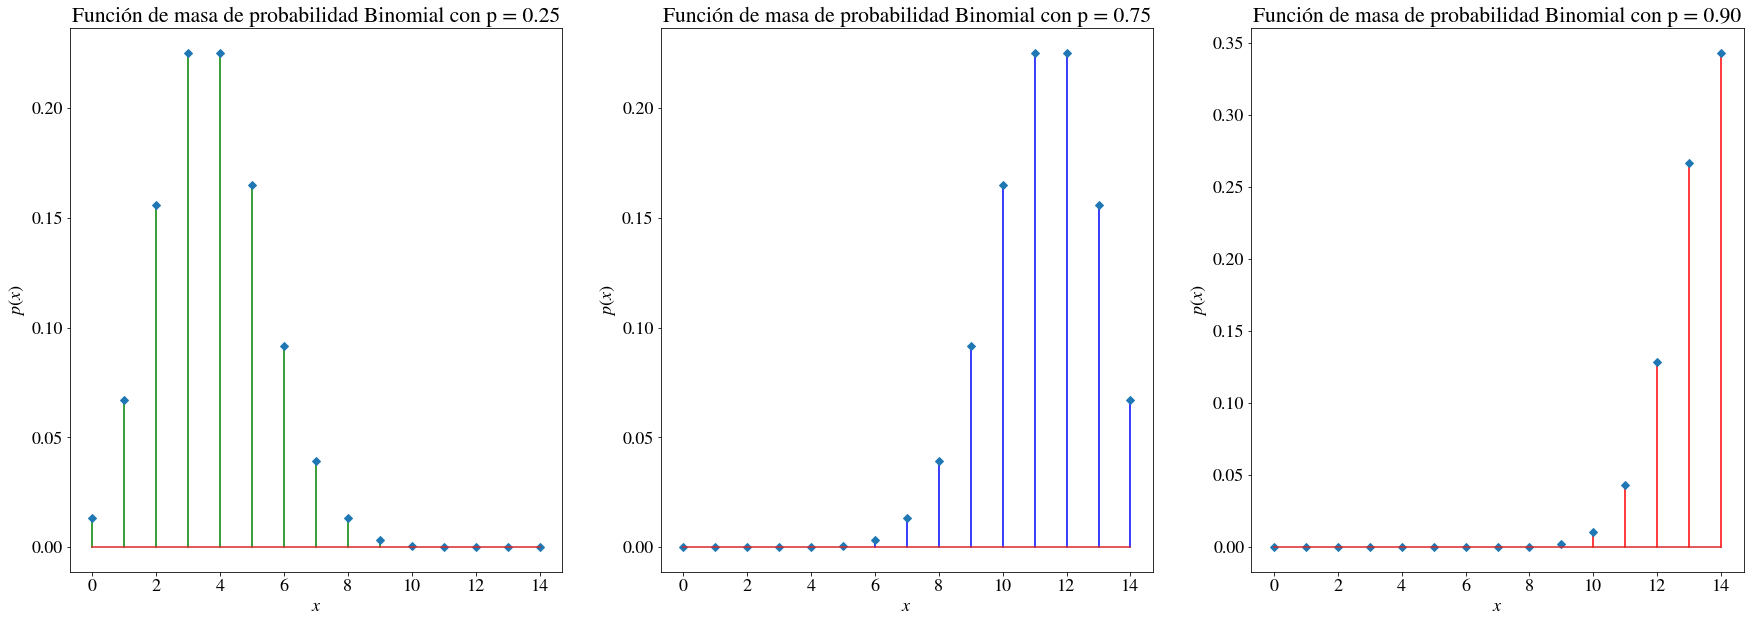

Los valores de la media son = 3.750, 11.250 y 13.500
Los valores de la varianza son = 2.812, 2.812 y 1.350


In [54]:
from scipy.stats import binom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(15)
p1, p2, p3 = 0.25, 0.75, 0.9
n = 15
BIN_1 = binom(n, p1)
BIN_2 = binom(n, p2)
BIN_3 = binom(n, p3)
P1 = BIN_1.pmf(x)
P2 = BIN_2.pmf(x)
P3 = BIN_3.pmf(x)

media_1, varianza_1, _, _ = binom.stats(n, p1, moments='mvsk')
media_2, varianza_2, _, _ = binom.stats(n, p2, moments='mvsk')
media_3, varianza_3, _, _ = binom.stats(n, p3, moments='mvsk')

fig = pyplot.figure(figsize=(30,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.2f}'.format(p1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.2f}'.format(p2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial con p = {:.2f}'.format(p3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

### Test Binomial

El test binomial es una prueba que desde los datos de una muestra permite determinar si la proporción de la población para una variable binaria es igual a un valor específico. Por ejemplo, un test binomial podría ser ver si la proporción de ingenieros de una empresa tienen habilidades de programación es igual $0.65$, lo cual es el valor esperado de la media de un modelo que analiza este tipo de escenario.

El test binomial calcula la probabilidad de obtener de un tamaño de muestra específico, $n$, el número de resultados esperados, que para este caso, seria el número de ingenieros con habilidades de programación. Por lo general, en el test binomial depende del cálculo de la función de masa de probabilidad binomial, $X \sim Bin(n,\rho)$.

Veamos un ejemplo práctico de este test.


Consideremos el siguiente problema: "Una empresa de desarrollo de Software dice que no más del 25% de las pruebas de calidad del software son ineficientes. Para 15 productos de software que son analizados, se encontraron que 5 productos de software son ineficientes. No obstante, varios expertos en ingeniería de software determinaron que puede haber 50%, 75% o inclusive 90% de sofware ineficientes debido a los cambios de personal que ha sufrido la empresa en los últimos dos años. Quiénes tendrán la razón?"

In [55]:
from scipy.stats import binom_test
import numpy as np

x = 5
p1, p2, p3, p4 = 0.25, 0.5, 0.75, 0.9
n = 15

valor_1 = binom_test(x, n, p = p1)
valor_2 = binom_test(x, n, p = p2)
valor_3 = binom_test(x, n, p = p3)
valor_4 = binom_test(x, n, p = p4)

print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p1,valor_1))
print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p2,valor_2))
print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p3,valor_3))
print("Valor de la prueba binomial con p = {:.2f} es = {:.8f}".format(p4,valor_4))

Valor de la prueba binomial con p = 0.25 es = 0.54960187
Valor de la prueba binomial con p = 0.50 es = 0.30175781
Valor de la prueba binomial con p = 0.75 es = 0.00079495
Valor de la prueba binomial con p = 0.90 es = 0.00000019


Si consideramos un umbral de decisión de $0.05$ que es lo mismo que decir que hay 5% de desconfianza en los expertos, se determina que los expertos 1 y 2 no tienen razón en su afirmación mientras que los expertos 3 y 4 tienen razón en afirmar que entre el 75% y el 90% de los productos de software tienen problemas de clalidad.

En la unidad 3, analizaremos a profunidad los test estadísticos.

## Función de distribución binomial negativa

La función de distribución binomial negativa, $X \sim Nbin(n,\rho)$, describe una secuencia de ensayos independientes basado en la distribución Bernoulli, donde la variable aleatoria $X$ denota el ensayo para $n$ sucesos o ensayos exitosos. A diferencia de la distribución binomial, esta distribución determina una variable aleatoria que representa el número de fracasos, $Y$. Matemáticamente, esta distribución esta dada por:

$$P(y=k\vert n,p) = \binom{n+y-1}{y}\rho^n(1 - \rho)^y,\,\,\, y = \lbrace 0,1,\ldots \rbrace$$

donde:

$$\binom{n+y-1}{y} = (-1)^y \binom{-n}{y} = (-1)^y \frac{(-n)(-n-1)\cdots (-n-y+1)}{(y)(y-1)\cdots (2)(1)}$$

Otra forma alternativa de definir matemáticamente esta distribución es la siguiente:

$$P(x=k\vert n,p) = \binom{x-1}{n-1}\rho^n(1 - \rho)^{x-n},\,\,\, x = \lbrace n,n+1,\ldots \rbrace$$

La media y la varianza de esta distribución están dados por:

$$\mu = n\left( \frac{1-\rho}{\rho} \right )$$

$$\sigma^2 = \frac{n(1-\rho)}{\rho^2}$$

Veamos un ejemplo práctico de esta distribución

La media es 15.000
La varianza es 30.000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


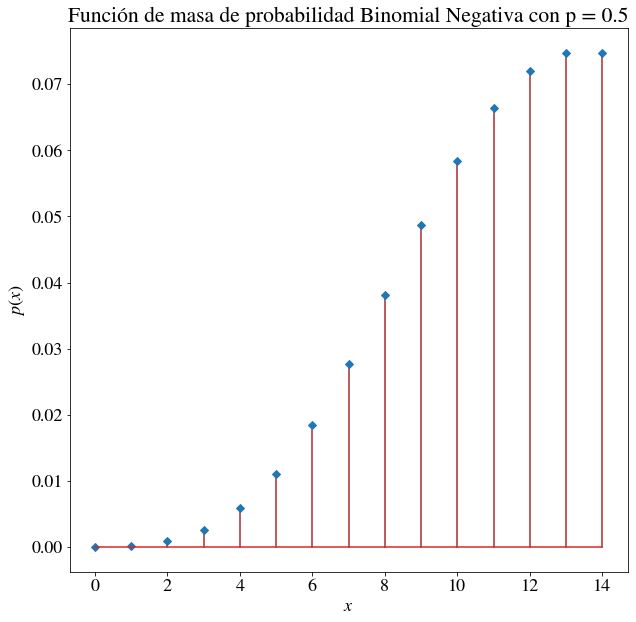

In [56]:
from scipy.stats import nbinom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

p, n = 0.5, 15
NBIN = nbinom(n, p)
x = np.arange(15)
P = NBIN.pmf(x)
media, varianza, _, _ = nbinom.stats(n, p, moments='mvsk')

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.1f}'.format(p))
pyplot.show()

Qué sucedería en la función de distribución binomial negativa para diferentes valores de $\rho$?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

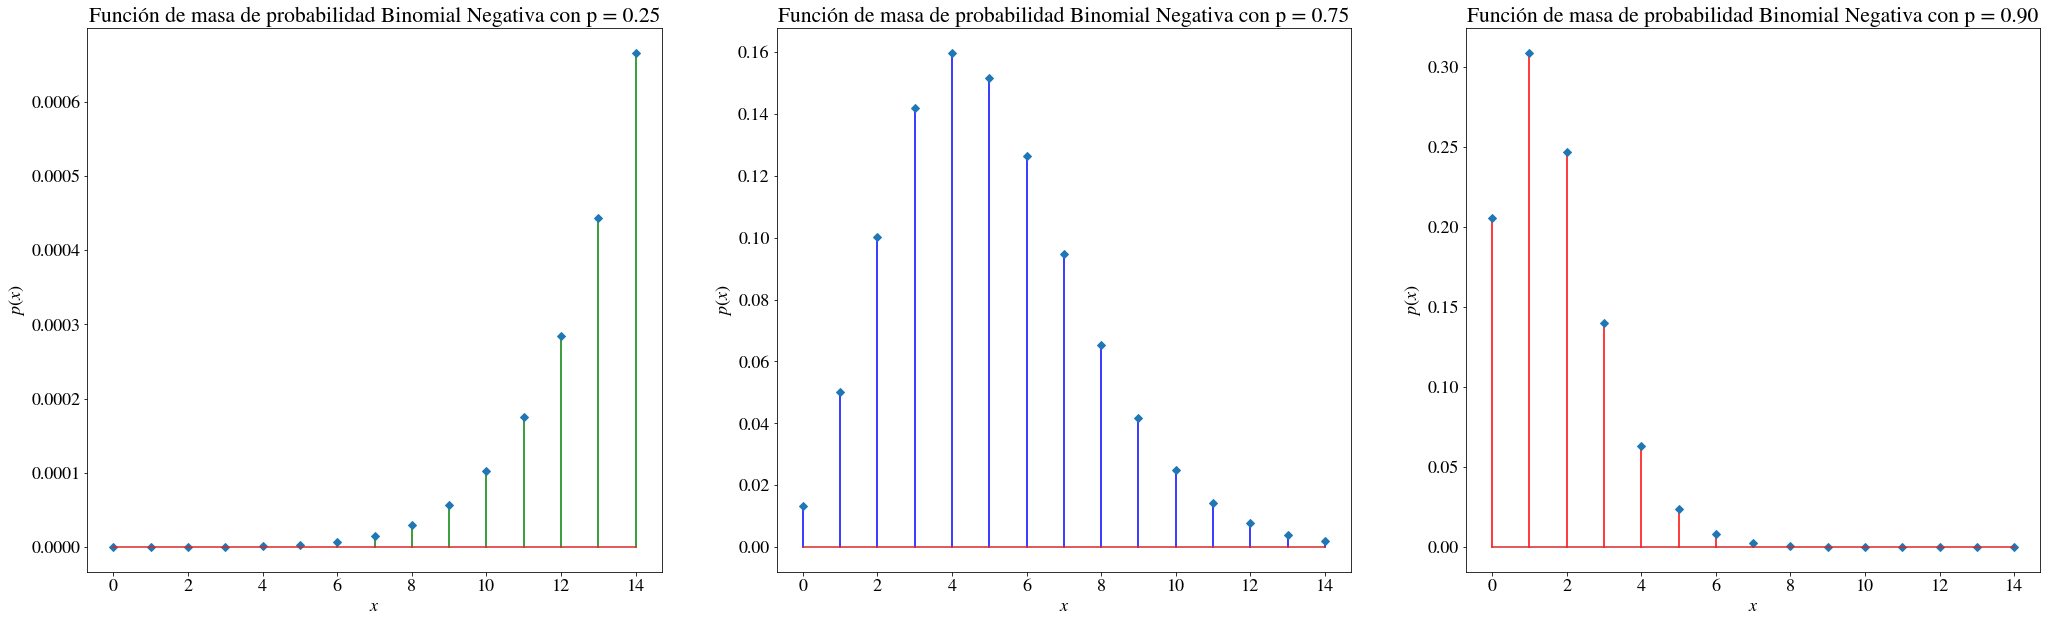

Los valores de la media son = 45.000, 5.000 y 1.667
Los valores de la varianza son = 180.000, 6.667 y 1.852


In [57]:
from scipy.stats import nbinom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(15)
p1, p2, p3 = 0.25, 0.75, 0.9
n = 15
NBIN_1 = nbinom(n, p1)
NBIN_2 = nbinom(n, p2)
NBIN_3 = nbinom(n, p3)
P1 = NBIN_1.pmf(x)
P2 = NBIN_2.pmf(x)
P3 = NBIN_3.pmf(x)

media_1, varianza_1, _, _ = nbinom.stats(n, p1, moments='mvsk')
media_2, varianza_2, _, _ = nbinom.stats(n, p2, moments='mvsk')
media_3, varianza_3, _, _ = nbinom.stats(n, p3, moments='mvsk')

fig = pyplot.figure(figsize=(35,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.2f}'.format(p1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.2f}'.format(p2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Binomial Negativa con p = {:.2f}'.format(p3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

### Test Binomial Negativa

El test binomial negativa esta basado en el test Binomial estándar pero se debe considerar dos muestras: número de éxitos y número de fracasos. Veamos un ejemplo práctico de este test

Consideremos el siguiente problema: "Un ciudadano colombiano tiene un negocio de empánadas que produce 200 empanadas en tres horas. De las 200 empanadas, hay 8 empanadas deliciosas y 2 empanadas regulares por cada 10 empanadas que produce en nueve minutos. Sin embargo, en una encuesta a los consumidores, dicen que de las empanadas que comen lunes a viernes, hay aproximadamente 10% o 60% de las empanadas que tienen un sabor regular"


In [58]:
from scipy.stats import binom_test
import numpy as np

xe, xf = 8, 2
p1, p2 = 0.1, 0.6
n = 10

valor_1 = binom_test([xe,xf], n, p = p1)
valor_2 = binom_test([xe,xf], n, p = p2)

print("Valor de la prueba binomial negativa con p = {:.2f} es = {:.8f}".format(p1,valor_1))
print("Valor de la prueba binomial negativa con p = {:.2f} es = {:.8f}".format(p2,valor_2))

Valor de la prueba binomial negativa con p = 0.10 es = 0.00000037
Valor de la prueba binomial negativa con p = 0.60 es = 0.33352837


Si consideramos un umbral de decisión de $0.05$, observen que el primer caso tiene un valor menor $0.05$ y por consiguiente, hay alrededor de 10% de las empanadas que pueden salir regulares. Por otra parte, el segundo caso tiene un valor mayor a $0.05$, lo cual se rechaza la hipótesis que el 60% de las empanadas salgan regulares.

## Función de distribución Geométrica

La función de distribución geométrica, $X \sim Geo(\rho)$, es un caso especial de la distribución binomial negativa cuando $n=1$. Al considerar dicha condición, la función se expresa como:

$$P(x=k \vert \rho) = \rho(1 - \rho)^{x - 1},\,\, x=\lbrace 1,2,\ldots \rbrace$$

Esta función considera $\rho$ como la probabilidad de éxitos, como en la función binomial estándar. La variable aleatoria $X$ se interpreta como el ensayo o experimento en el cual el primer éxito se presenta y por consiguiente, se aguarda a esperar si se presenta un nuevo éxito. 

La media y la varianza de esta distribución está dado por:

$$\mu = \frac{1}{\rho}$$

$$\sigma^2 = \frac{1 - \rho}{\rho^2}$$

Una característica interesante de esta distribución es una propiedad llamada **sin memoría**, que significa que la distribución geométrica olvida lo que sucedio anteriormente. 

Veamos un ejemplo práctico de dicha distribución.

La media es 2.000
La varianza es 2.000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


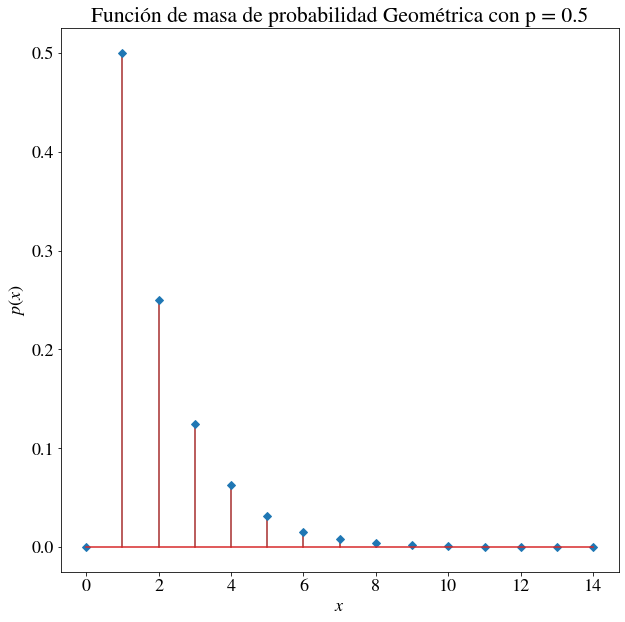

In [59]:
from scipy.stats import geom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

p = 0.5
GEO = geom(p)
x = np.arange(15)
P = GEO.pmf(x)
media, varianza, _, _ = geom.stats(p, moments='mvsk')

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.1f}'.format(p))
pyplot.show()

Qué sucedería en la función de distribución geométrica para diferentes valores de $\rho$?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

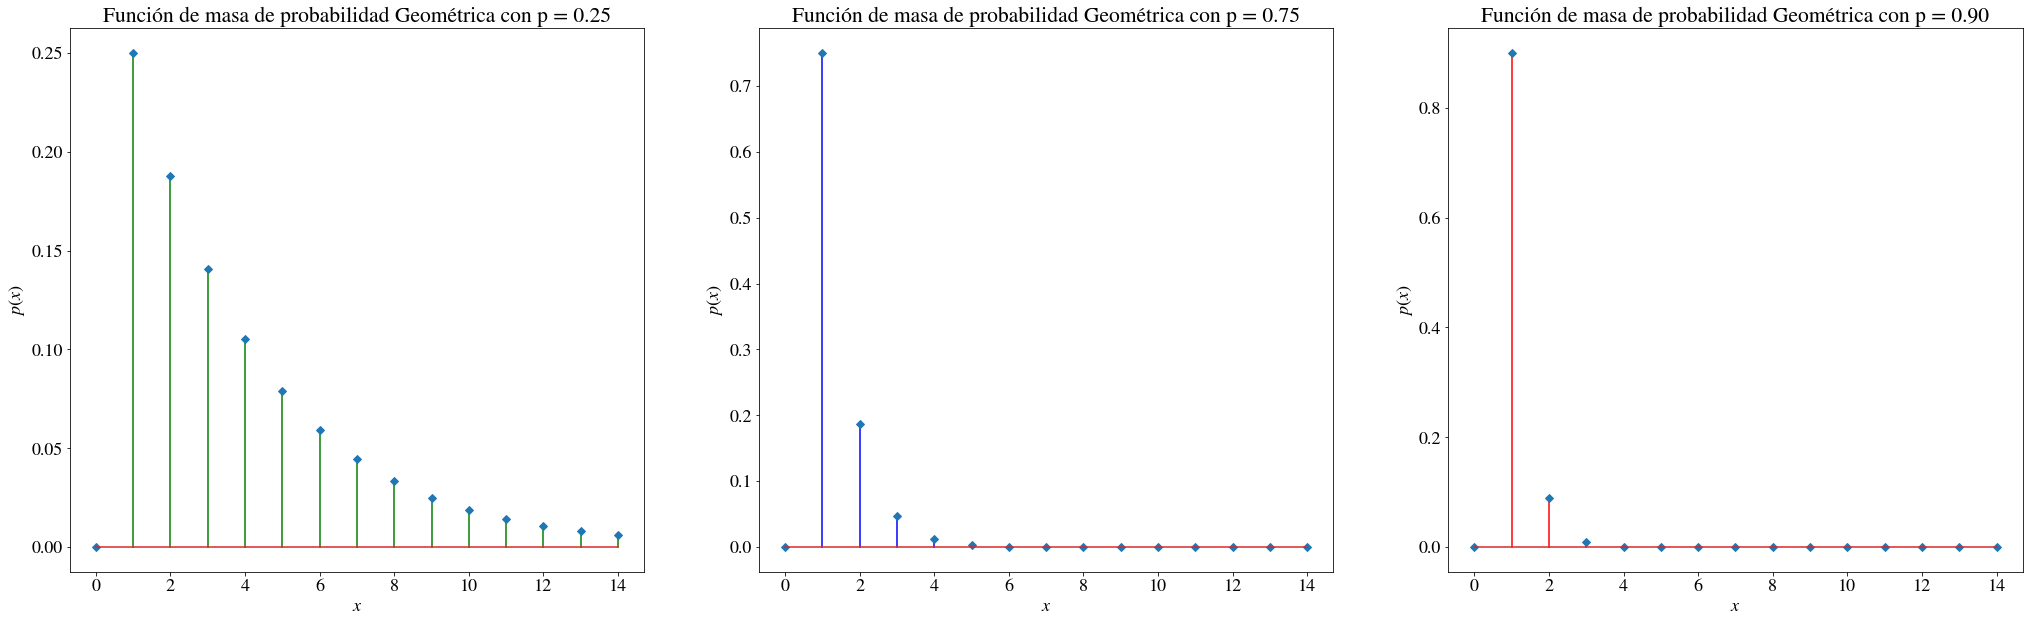

Los valores de la media son = 4.000, 1.333 y 1.111
Los valores de la varianza son = 12.000, 0.444 y 0.123


In [60]:
from scipy.stats import geom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(15)
p1, p2, p3 = 0.25, 0.75, 0.9
GEO_1 = geom(p1)
GEO_2 = geom(p2)
GEO_3 = geom(p3)
P1 = GEO_1.pmf(x)
P2 = GEO_2.pmf(x)
P3 = GEO_3.pmf(x)

media_1, varianza_1, _, _ = geom.stats(p1, moments='mvsk')
media_2, varianza_2, _, _ = geom.stats(p2, moments='mvsk')
media_3, varianza_3, _, _ = geom.stats(p3, moments='mvsk')

fig = pyplot.figure(figsize=(35,10))

ax = fig.add_subplot(1, 3, 1)
ax.stem(x, P1, linefmt='green', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.2f}'.format(p1))

ax = fig.add_subplot(1, 3, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.2f}'.format(p2))

ax = fig.add_subplot(1, 3, 3)
ax.stem(x, P3, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Geométrica con p = {:.2f}'.format(p3))
pyplot.show()

print("Los valores de la media son = {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la varianza son = {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

## Función de distribución Hipergeométrica

La distribución de masa de probabilidad hipergeométrica, $X \sim HGeo(n,M,N)$, es una función que considera el número de posbiles maneras de obtener el tamaño de la muestra $\binom{N}{n}$, siendo que se considere un número de fracasos $M$ y como la variable aleatoria $X$ puede ser muestreado como $\binom{M}{x}$, de diferentes maneras. La función de masa está dado por:

$$p(X = k\vert n,M.N) = \frac{\binom{M}{x}\binom{N-M}{n-x}}{\binom{N}{n}}$$

donde $x$ es un número entero que está limitado en un rango entre $\max \lbrace 0, n-N+M\rbrace$ y $\min\lbrace n,M\rbrace$.

La media y la varianza de esta distribución está dado por:

$$\mu = n\left (\frac{M}{N} \right)$$

$$\sigma^2 = n \left(\frac{M}{N}\right) \left(\frac{N-M}{N}\right) \left(\frac{N-n}{N-1}\right)$$

Veamos un ejemplo práctico de esta distribución.

Consideremos el siguiente problema: "En el restaurante de Pino Prestanizzi hacen 200 pizzas por día. De estas 200 pizzas, hay 20 pizzas que tienen tomates Milano dañados. Si consideramos una muestra aleatoria de $n$ pizzas, denotamos $X$ como el número de pizzas con tomates Milano de baja calidad obtenidos desde la muestra $n$. Pino Prestanizzi, con la rabia característica que lo conocen sus empleados, desea saber si con $n = 10$ pizzas, hay alguna pizza con tomates de mala calidad".

La media es 1.000
La varianza es 0.859


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


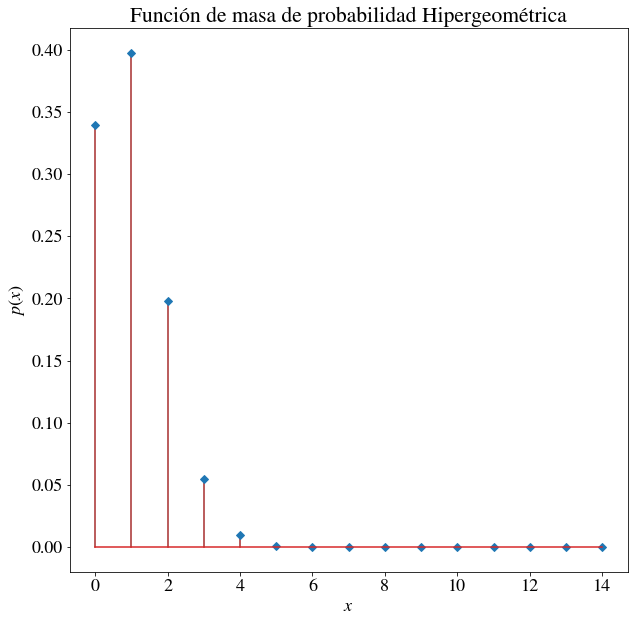

In [61]:
from scipy.stats import hypergeom
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

N = 200
M = 20
n = 10
x = np.arange(15)
HYG = hypergeom(N,M,n)
P = HYG.pmf(x)

media = hypergeom.mean(N,M,n)
varianza = hypergeom.var(N,M,n)

print("La media es {:.3f}".format(media))
print("La varianza es {:.3f}".format(varianza))

pyplot.figure(figsize=(10,10))
pyplot.stem(x, P, linefmt='brown', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Hipergeométrica')
pyplot.show()

In [62]:
P_pizza_defectosa = np.max(P)
P_pizza_defectosa 

0.3973969312711745

In [63]:
x_pizza_defectuosa = np.argmax(P)
x_pizza_defectuosa

1

Para el ejemplo anterior, efectivamente, hay una pizza (x = 1), que tiene tomate Milano de mala calidad con una probabilidad de $P(x = 1) = 0.397$

## Función de distribución de probabilidad Poisson

La distribución de probabilidad Poisson, $X \sim Poi(\lambda)$, es similar a la distribución binomial donde se analiza como el número de veces que ocurre un evento en un periodo de espacio o tiempo se puede presentar. A diferencia de las anteriores distribuciones, está distribución no tiene un valor total de muestras $n$, solamente está definido por un único parámetro que llamaremos $\lambda$.

Las siguientes preguntas pueden ser respondidas con la distribución de Poisson:

*   ¿Cuántos conejitos me encontraré en mi camino a casa?
*   ¿Cuántos ancianos serán atendidos en la UCI hoy?
*   ¿Cuántos productos venderé después de emitir un nuevo anuncio en Facebook?
*   ¿Cuántas caídas de servicio celular habrá por cada 1000 llamadas que se presentá en la estación central por cada minuto?

Para este tipo de distribución, la variable aleatoria $X$ considera el número de eventos que puede tomar cualquier valor entero no negativo, es decir, $X = \lbrace 1,2,\ldots \rbrace$. Por ejemplo, podría hacer una llamada por celular y que no se caiga la llamada (en términos coloquiales). Pero se puede presentar el caso que se corte la llamada cuando lleve un minuto de servicio del operador móvil. 

Matemáticamente, la distribución de masa de probabilidad Poisson se expresa como:

$$P(x = k\vert \lambda) = \frac{\exp(-\lambda)\lambda^x}{x!}$$

A diferencia del parámetro $\rho$ de la distribución Binomial, el parámetro $\lambda$ representa el promedio o número experado de eventos que ocurrirá en un evento o suceso.

Una caracteristica curiosa de esta distribución es que la media y la varianza son iguales a $\lambda$, es decir, $\mu = \sigma^2 = \lambda$.

Veamos un ejemplo práctico de esta distribución.

Consideremos el siguiente problema: "La empresa Hughes Net está monitoreando la estabilidad de la velocidad del internet satelital a los usuarios de los corregimientos más cercanos a Medellin. Según sus resultados, para 10 usuarios de un corregimiento tiene una estimación entre 2 y 5 usarios que tengan una baja velocidad del internet entre las 10 am y las 11 am de los días martes y miércoles. Por consiguiente, se desea conocer la mayor probabilidad que la velocidad tenga una disminución drástica a ese grupo de usuarios".

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Los valores de la media son 2.000 y 5.000
Los valores de la covarianza son 2.000 y 5.000


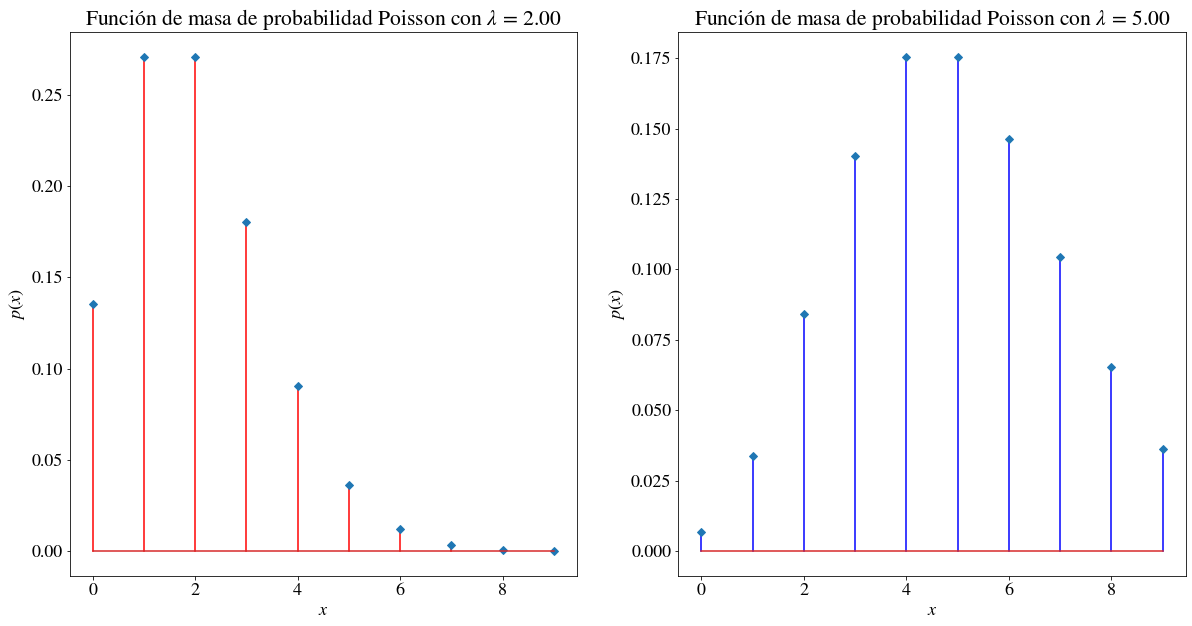

In [64]:
from scipy.stats import poisson
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

lamda_1, lamda_2 = 2, 5
x = np.arange(10)
POI_1 = poisson(lamda_1)
POI_2 = poisson(lamda_2)
P1 = POI_1.pmf(x)
P2 = POI_2.pmf(x)

media_1 = poisson.mean(lamda_1)
media_2 = poisson.mean(lamda_2)
varianza_1 = poisson.mean(lamda_1)
varianza_2 = poisson.mean(lamda_2)

fig = pyplot.figure(figsize=(20,10))

ax = fig.add_subplot(1, 2, 1)
ax.stem(x, P1, linefmt='red', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Poisson con $\lambda$ = {:.2f}'.format(lamda_1))

ax = fig.add_subplot(1, 2, 2)
ax.stem(x, P2, linefmt='blue', markerfmt='D')
pyplot.xlabel('$x$')
pyplot.ylabel('$p(x)$')
pyplot.title('Función de masa de probabilidad Poisson con $\lambda$ = {:.2f}'.format(lamda_2))

print("Los valores de la media son {:.3f} y {:.3f}".format(media_1, media_2))
print("Los valores de la covarianza son {:.3f} y {:.3f}".format(varianza_1, varianza_2))

Cuando $\lambda = 2$, se observa que los usuarios 1 y 2 tienen mayor probabilidad que se reduzca la velocidad del internet. Por otra parte, si $\lambda = 5$, los usuarios 4 y 5 tienen mayor probabilidad con respecto a los demás usuarios que se reduzca la velocidad del internet pero con valor de probabilidad más bajo en comparación con el caso de $\lambda = 2$.

# Funciones de distribución continua

Supongamos que la variable aleatoria $X$ es continuo sobre los posbiles valores de $x$. Definimos la **función de densidad de probabilidad** como una distribución continua, $f(x)$, tal que para un rango $\lbrack a,b \rbrack$ está definido como:

$$f(x) = \mathbb{P}(X \in \lbrack a, b \rbrack) = \int_a^b f(x)dx$$

Obviamente, para un rango $R_x = \lbrack a,b \rbrack$, decimos que para una distribución con una variable $s$ definimos:

$$\int_{R_x} f(s)ds = 1$$

A partir de lo anterior, se define la **función de densidad acumulada**, que es un nombre especial para las probabilidades acumuladas de una función continua de un evento, $P(X < x)$.

De forma general, la función de densidad acumulada está dado por:

$$P(X < z) = \int_{-\infty}^x f(s)ds$$

## Función de distribución Uniforme

La distribución de densidad de probabilidad uniforme, $X \sim Unif(a,b)$, es una distribución sobre el intervalor $\lbrack a,b \rbrack$, tal que $b > 0$. Si $a,b \in \mathbb{R^+}$, para cualesquiera números reales, la función está dada por:

$$f(x;a,b) = \frac{1}{b-a}, \,\, a\leq x \leq b,\,\, siendo\,\, b>a $$

La media y la varianza de esta distribución están dado por:

$$\mu = \frac{a+b}{2}$$

$$\sigma^2 = \frac{(b-a)^2}{12}$$

Veamos un ejemplo práctico de esta distribución.

Consideremos el siguiente problema: "En una agencia de seguridad industrial, contrató a un grupo de PhDs de una prestigiosa universidad para analizar el diseño de un switch que genera señales aleatorias cuya trayectoria es uniformemente distribuido sobre un intervalo entre $0$ y $1$. La agencia está interesado en calcular la probabilidad que la trayectoria cae en un intervalo entre $0.3$ y $0.61$".

La media es = 0.459
La varianza es = 0.000005344


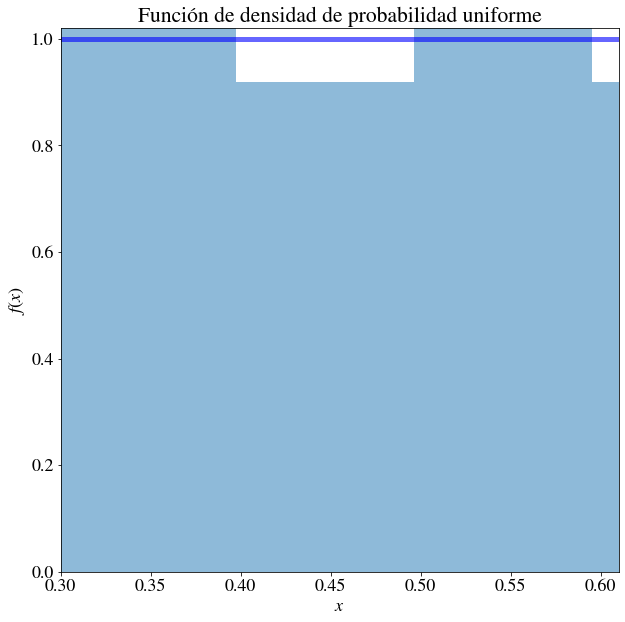

In [65]:
from scipy.stats import uniform
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

a,b = 0.3,0.61
media = (a+b)/2
varianza = (b-a)**2/12
media_u,varianza_u,_,_ = uniform.stats(loc = media, scale = varianza, moments = 'mvsk')
print("La media es = {:.3f}".format(media_u))
print("La varianza es = {:.9f}".format(varianza_u))

x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 110)
UNIF = uniform()
P = UNIF.pdf(x)

pyplot.figure(figsize=(10,10))
pyplot.plot(x, P, 'b-', lw = 5, alpha = 0.6, label='pdf uniforme')
pyplot.hist(uniform.rvs(size = 110), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.axis([a,b,0,1.02])
pyplot.title('Función de densidad de probabilidad uniforme')
pyplot.show()

In [66]:
DIF = UNIF.cdf(b) - UNIF.cdf(a) # cdf es la función de densidad acumulada
print("Valor de la trayectoria donde hay mayor probabilidad que se active el switch es = {:.3f}".format(DIF))

Valor de la trayectoria donde hay mayor probabilidad que se active el switch es = 0.310


## Función de distribución Gaussiana

La función de densidad probabilidad Gaussiana, $X \sim Gauss(\mu,\sigma^2)$, es una función que tiene la siguiente expresión:

$$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left( -\frac{(x-\mu)^2}{\sigma^2} \right )$$

donde $\mu$, $\sigma$ ($\sigma > 0$) y $-\infty < x < \infty$.

Esta función de densidad de probabilidad está sujeto a las siguientes propiedades:

*Propiedad 1:*

$f(x;\mu,\sigma)$ es simétrico en términos de $x = \mu$. En otras palabras, se dice que $f(\mu - x) = f(\mu + x)$

*Propiedad 2:*

$f(x;\mu,\sigma)$ tiene una simetría central para un punto con coordenadas $(\mu, 0.5)$. Lo anterior permite establecer que $f(\mu - x) = 1 - f(\mu + x)$

*Propiedad 3:*

La esperanza y la varianza de $X$ son $\mathbb{E}\lbrack X \rbrack = \mu$ y $\mathbb{V}\lbrack X \rbrack = \sigma^2$. La media determina el punto central, mientras que la desviación estándar determina la inclinación.

Por otra parte, la variable aleatoria $X$ está sujeto a una distribución normal con parámetro $\mu$ y $\sigma$, si $\mu = 0$ y $\sigma = 1$, lo cual se genera la **distribución normal estándar o Z**. Lo anterior es una forma de *estandarizar* o *tipificar* las variables aleatorias, lo cual se mide el desplazamiento de la función con respecto a $\mu$ en unidades de desviación estándar $\sigma$:

$$z_i = \frac{y_i - \bar{y}}{\sigma_i}$$

donde $\bar{y} = \frac{1}{N}\sum_{i=1}^N y_i$ es el estadístico de media, $y_i$ es una muestra aleatoria de $N$ datos de la población, es decir, $i = \lbrace 1, \ldots, N \rbrace$, y $\sigma_i$ es la desviación estándar de una muestra poblacional. Por consiguiente, la función se expresa en término de $z$ como:

$$f(z) = \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{1}{2} z^2 \right )$$

donde esta distribución coinciden con la media y la mediana en $0$ y $f(z)$ permite disponer del valor de la distribución de probabilidad bajo el área de la curva para cualquier valor de de la función estándar.

A partir de la función de distribución normal estándar, surge una cuarta propiedad de la función Gaussiana:

*Propiedad 4:*

$$\mathbb{P}(\mu - 3\sigma \leq X \leq \mu + 3\sigma) = 0.9973$$

Esta propiedad menciona que si la variable aleatoria esta sujeto a una distribución normal, entonces el $99.73\%$ de sus valores estarán localizados en el intervalo con centro $\mu$ y longitud o escala $3\sigma$. Lo anterior se denomina como el **principio $3\sigma$**, el cual es ampliamente aplicado en estadística.

Veamos varios ejemplo prácticos de está importante distribución.


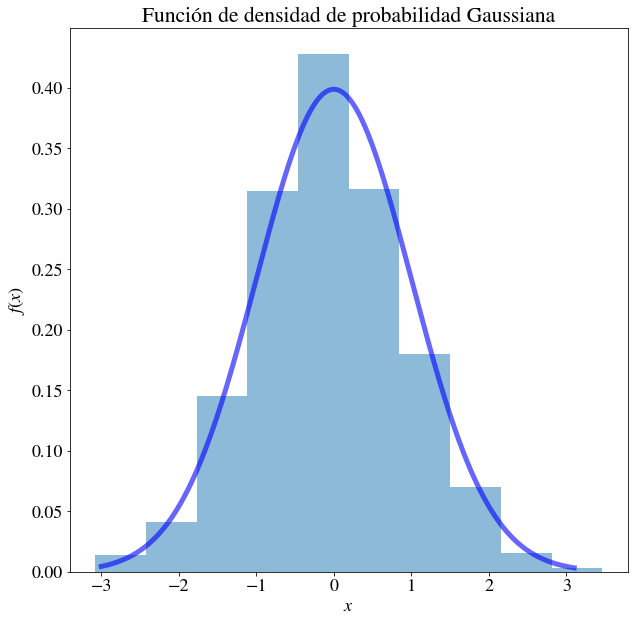

In [12]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

x = np.arange(-3,3.1,0.001)
f = norm.pdf(x)
pyplot.figure(figsize=(10,10))
pyplot.plot(x, f, 'b-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.hist(norm.rvs(size = 1000), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana')
pyplot.show()

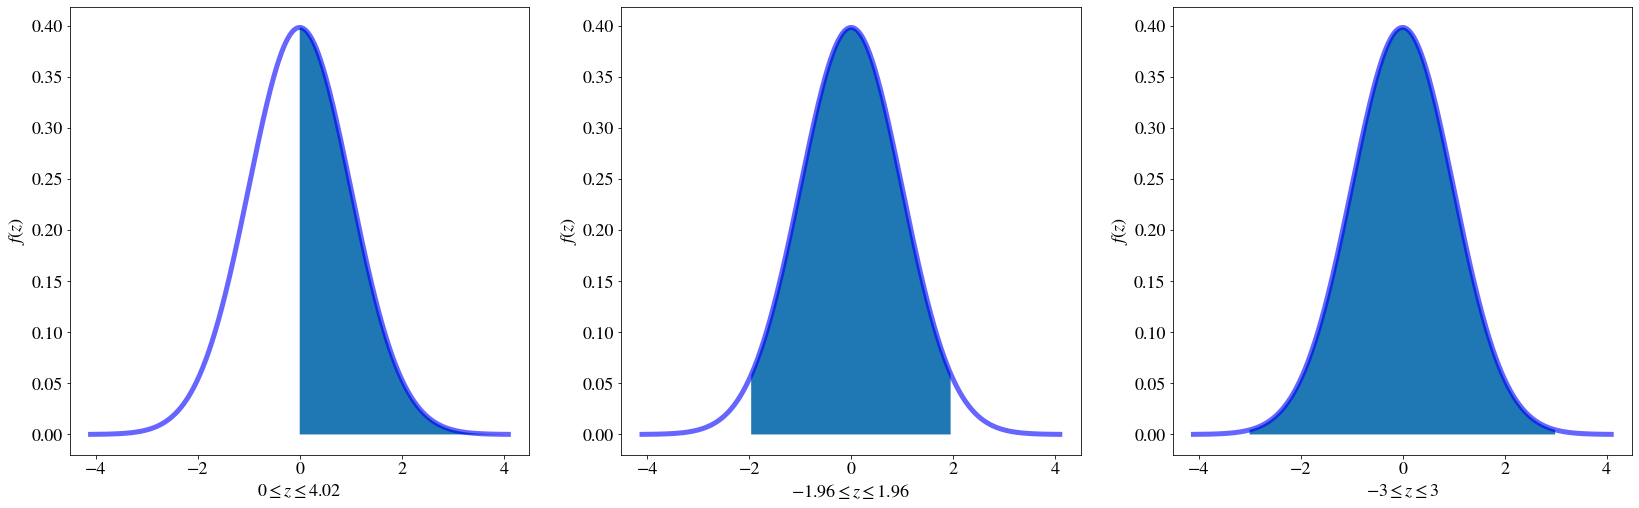

In [13]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

z = np.arange(-4.1,4.1, 0.01)
z1 = np.arange(0,4.02, 0.01)
z2 = np.arange(-1.96,1.96, 0.01)
z3 = np.arange(-3,3, 0.01)

P = norm.pdf(z)
P1 = norm.pdf(z1)
P2 = norm.pdf(z2)
P3 = norm.pdf(z3)

fig = pyplot.figure(figsize=(28,28))
ax = fig.add_subplot(3, 3, 1)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(z1,P1)
pyplot.xlabel('$0 \leq z \leq 4.02$')
pyplot.ylabel('$f(z)$')

ax = fig.add_subplot(3, 3, 2)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(z2,P2)
pyplot.xlabel('$-1.96 \leq z \leq 1.96$')
pyplot.ylabel('$f(z)$')

ax = fig.add_subplot(3, 3, 3)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(z3,P3)
pyplot.xlabel('$-3 \leq z \leq 3$')
pyplot.ylabel('$f(z)$')
pyplot.show()

Si la media es $115$ y la desviación estándar es $20$ para una población con distribución normal , podemos realizar el siguiente análisis práctico

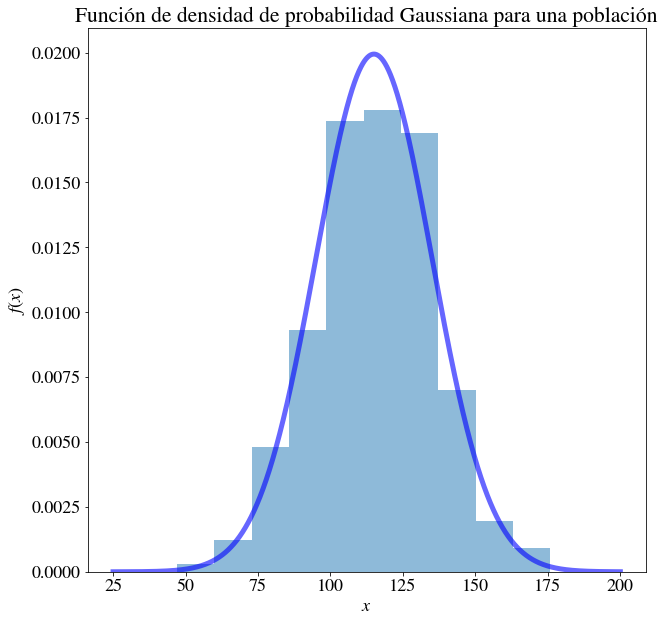

In [23]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(25,200, 0.001)
P = norm.pdf(x, loc = 115, scale = 20)

pyplot.figure(figsize=(10,10))
pyplot.plot(x, P, 'b-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.hist(norm.rvs(size = 1000, loc = 115, scale = 20), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana para una población')
pyplot.show()

In [24]:
print("La probabilidad de observar valores inferiores a 70 es = {:.6f}".format(norm.cdf((70-115)/20, loc = 0, scale = 1)))

La probabilidad de observar valores inferiores a 70 es = 0.012224


In [25]:
print("La probabilidad de observar valores superiores a 150 es = {:.6f}".format(1 - norm.cdf((150-115)/20, loc = 0, scale = 1)))

La probabilidad de observar valores superiores a 150 es = 0.040059


In [26]:
print("La probabilidad de observaciones en el intervalo entre 90 y 130 es = {:.6f}".format(norm.cdf((130-115)/20, loc = 0, scale = 1) - norm.cdf((90-115)/20, loc = 0, scale = 1)))

La probabilidad de observaciones en el intervalo entre 90 y 130 es = 0.667723


Cuáles son los intervalos simétricos tiene el $80\%$ y el $95\%$ de las observaciones?

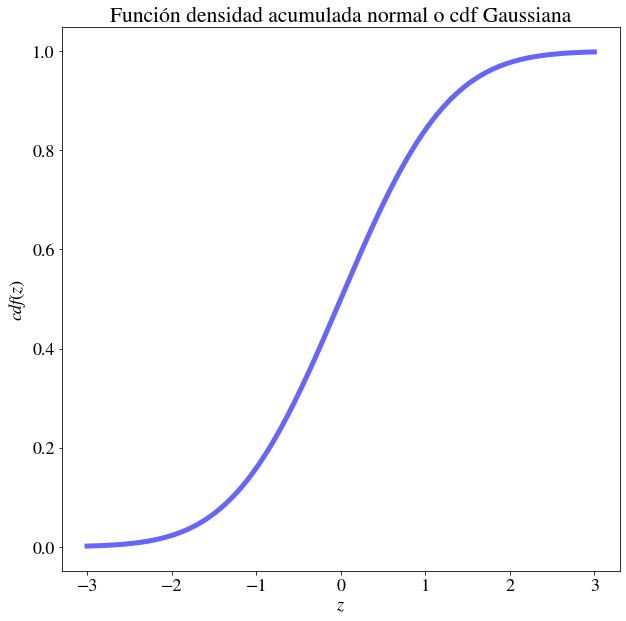

In [70]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

zz = np.arange(-3,3, 0.001)
PP = norm.cdf(zz, loc = 0, scale = 1)

pyplot.figure(figsize=(10,10))
pyplot.plot(zz, PP, 'b-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.xlabel('$z$')
pyplot.ylabel('$cdf(z)$')
pyplot.title('Función densidad acumulada normal o cdf Gaussiana')
pyplot.show()

Por lo general, el $80\%$ se determina en la curva de la cdf Gaussiana con $a = 0.1$ y el $95\%$ es $a = 0.025$

$$a_1 = \frac{1 - F}{2} = \frac{1 - 0.8}{2} = 0.1$$

$$a_2 = \frac{1 - F}{2} = \frac{1 - 0.95}{2} = 0.025$$

In [71]:
POS1 = np.min(np.where(PP >= 0.1))
POS2 = np.min(np.where(PP >= 0.025))
z1 = np.abs(zz[POS1])
z2 = np.abs(zz[POS2])
print("a(0.1) = z1 = {:.2f}".format(z1))
print("a(0.025) = z2 = {:.2f}".format(z2))

a(0.1) = z1 = 1.28
a(0.025) = z2 = 1.96


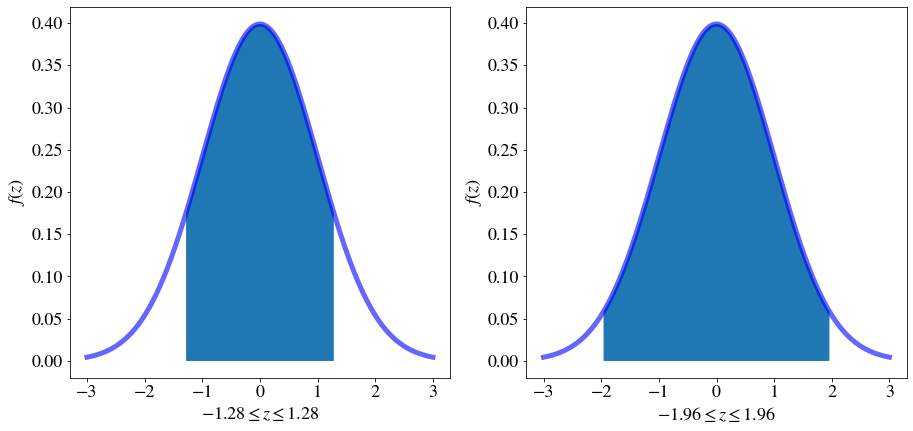

In [72]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

z = np.arange(-3,3, 0.001)
zz1 = np.arange(-z1,z1, 0.001)
zz2 = np.arange(-z2,z2, 0.001)

P = norm.pdf(z)
P1 = norm.pdf(zz1)
P2 = norm.pdf(zz2)

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(2, 2, 1)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(zz1,P1)
pyplot.xlabel('$-{:.2f} \leq z \leq {:.2f}$'.format(z1,z1))
pyplot.ylabel('$f(z)$')

ax = fig.add_subplot(2, 2, 2)
pyplot.plot(z, P, 'b-', lw = 5, alpha = 0.6)
pyplot.fill_between(zz2,P2)
pyplot.xlabel('$-{:.2f} \leq z \leq {:.2f}$'.format(z2,z2))
pyplot.ylabel('$f(z)$')
pyplot.show()

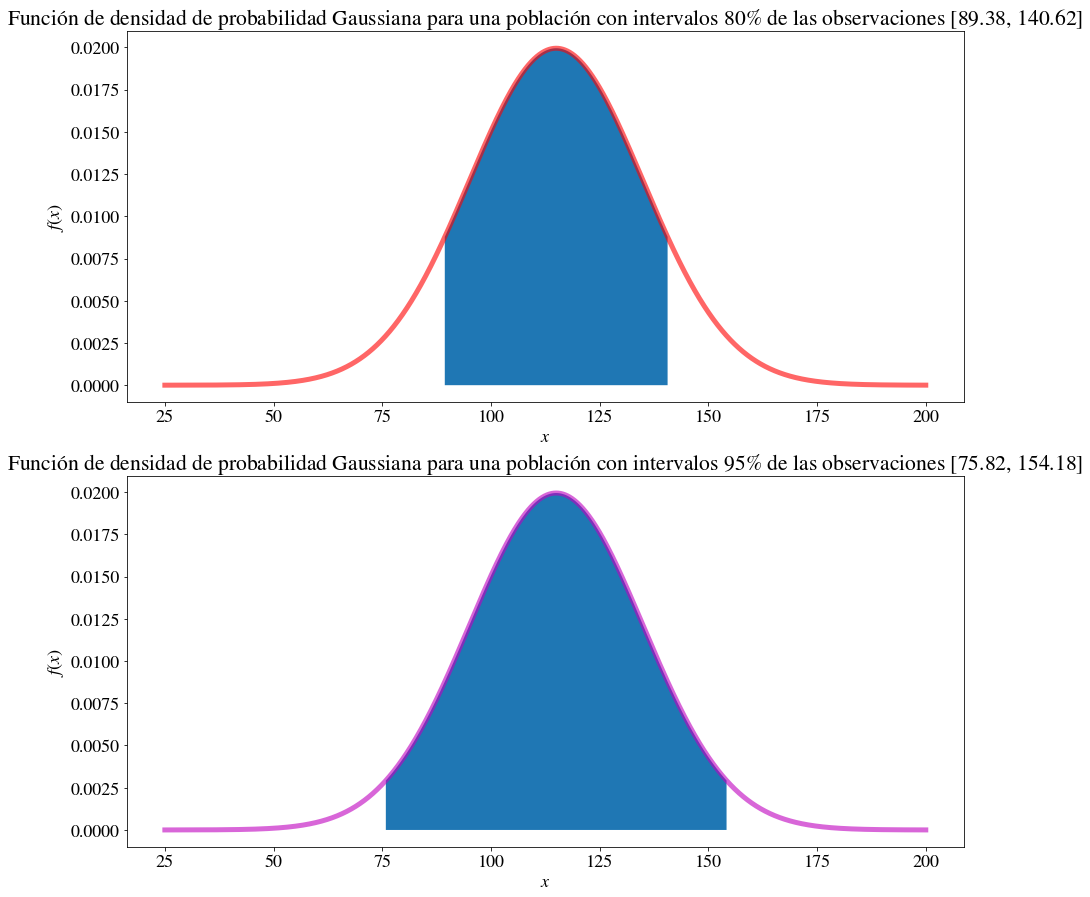

In [73]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

media = 115 
desv_std = 20
X11 = media - z1*desv_std
X12 = media + z1*desv_std
X21 = media - z2*desv_std
X22 = media + z2*desv_std

x = np.arange(25,200, 0.001)
x1 = np.arange(X11,X12, 0.001)
x2 = np.arange(X21,X22, 0.001)

P = norm.pdf(x, loc = 115, scale = 20)
P1 = norm.pdf(x1, loc = 115, scale = 20)
P2 = norm.pdf(x2, loc = 115, scale = 20)

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(2, 1, 1)
pyplot.plot(x, P, 'r-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.fill_between(x1,P1)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana para una población con intervalos $80\%$ de las observaciones [{:.2f}, {:.2f}]'.format(X11,X12))

ax = fig.add_subplot(2, 1, 2)
pyplot.plot(x, P, 'm-', lw = 5, alpha = 0.6, label='pdf Gaussiano')
pyplot.fill_between(x2,P2)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Función de densidad de probabilidad Gaussiana para una población con intervalos $95\%$ de las observaciones [{:.2f}, {:.2f}]'.format(X21,X22))
pyplot.show()

## Función de distribución Gamma $(\Gamma)$

La función de densidad de probabilidad Gamma,$X \sim \Gamma(\alpha, \lambda)$, es una distribución para variables aleatorias *np-negativas*, donde tiene dos parámetros $\lambda > 0$ y $\alpha > 0$, y una función gamma $\Gamma(z)$, la distribución de densidad de probabilidad $f(x)$ está dado por:

$$f(x; \alpha, \lambda) = \begin{cases} \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha - 1} & Si\,\, x \geq 0 \\ 0 & Si\,\, x < 0 \end{cases}$$

donde $\Gamma(\alpha)$ es una función Gamma que normaliza la función de densidad de probabilidad para asegurar que $0 \leq f(x; \alpha, \lambda) \leq 1$.

La media y la varianza de esta distribución está dado por:

$$\mu = \frac{\alpha}{\lambda}$$

$$\sigma^2= \frac{\alpha}{\lambda^2}$$

Veamos un ejemplo práctico de esta distribución

Los valores de la media son 0.886, 1.329 y 1.000
Los valores de la covarianza son 0.215, 0.233 y 1.000


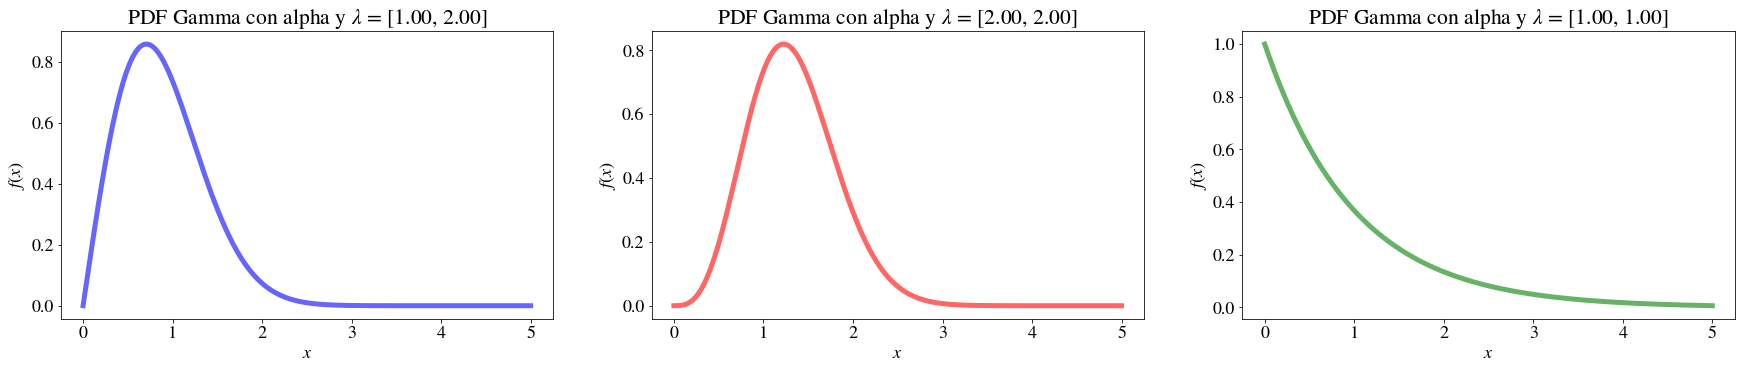

In [32]:
from scipy.stats import gengamma
import numpy as np
import matplotlib
from matplotlib import pyplot

a1, a2, a3 = 1, 2, 1
L1, L2, L3 = 2, 2, 1

media_1, varianza_1, _, _ = gengamma.stats(a1, L1, moments='mvsk')
media_2, varianza_2, _, _ = gengamma.stats(a2, L2, moments='mvsk')
media_3, varianza_3, _, _ = gengamma.stats(a3, L3, moments='mvsk')

print("Los valores de la media son {:.3f}, {:.3f} y {:.3f}".format(media_1, media_2, media_3))
print("Los valores de la covarianza son {:.3f}, {:.3f} y {:.3f}".format(varianza_1, varianza_2, varianza_3))

x = np.arange(0,5,0.001)
f1 = gengamma.pdf(x,a1,L1)
f2 = gengamma.pdf(x,a2,L2)
f3 = gengamma.pdf(x,a3,L3)

fig = pyplot.figure(figsize=(30,18))
ax = fig.add_subplot(3, 3, 1)
pyplot.plot(x, f1, 'b-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('PDF Gamma con alpha y $\lambda$ = [{:.2f}, {:.2f}]'.format(a1,L1))

ax = fig.add_subplot(3, 3, 2)
pyplot.plot(x, f2, 'r-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('PDF Gamma con alpha y $\lambda$ = [{:.2f}, {:.2f}]'.format(a2,L2))

ax = fig.add_subplot(3, 3, 3)
pyplot.plot(x, f3, 'g-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('PDF Gamma con alpha y $\lambda$ = [{:.2f}, {:.2f}]'.format(a3,L3))
pyplot.show()

## Función de distribución Weibull

---



La función de densidad Weibull, $X \sim Wei(\beta, \gamma, \eta)$, es una función que contiene tres parámetros, $\beta, \gamma, \eta$, donde $\beta$ es el parámetro de la forma de la función o **envolvente Weibull**, $\gamma$ es el parámetro de localización (relacionado con la media) y $\eta$ es el parámetro de escala (relacionado con la varianza):

$$f(x;\beta, \gamma, \eta) = \frac{\beta}{\eta} \left( \frac{x - \gamma}{\eta}\right)^{\beta - 1} \exp\left\lbrack- \left( \frac{x - \gamma}{\eta} \right)\right\rbrack^\beta$$

Por lo general, $x \geq \gamma$, $\beta > 0$, $\eta > 0$, $-\infty < \gamma < +\infty$. En la práctica, $\gamma = 0$ para facilitar el uso de esta función y reducir la cantidad de parámetros. 

La media y la varianza de esta distribución está dado por:

$$\mu = \eta \cdot\Gamma\left( 1 + \frac{1}{\beta}\right)$$

$$\sigma^2 = \eta^2 \left \lbrack \Gamma \left(1 + \frac{2}{\beta}\right ) - \left ( \Gamma\left ( 1 + \frac{1}{\beta} \right) \right)^2 \right\rbrack$$

Como pueden observar el cálculo de ambos estadísticos es complejo debido a la dependencia de una función $\Gamma$. Sin embargo, se puede facilitar el análisis de esta función de densidad de probabilidad, considerando dos interpretaciones que se explicarán a continuación:

### Función de distribución Weibull mínimo

La función Weibull mínimo, $X \sim Weimin(\beta)$, es una aproximación basado en la teoría del valor extremo que limita la distribución a una escala mínima. 

$$f(x;\beta) = \beta\cdot x^{\beta - 1} \exp(-x^\beta)$$

Para esta función, $\beta$ cambia la forma de la envolvente de la función. Veamos un ejemplo práctico de esta distribución.

la media y la varianza con beta = 1.00 son = 1.000 y 1.000
la media y la varianza con beta = 1.20 son = 0.941 y 0.620
la media y la varianza con beta = 1.50 son = 0.903 y 0.376
la media y la varianza con beta = 2.00 son = 0.886 y 0.215


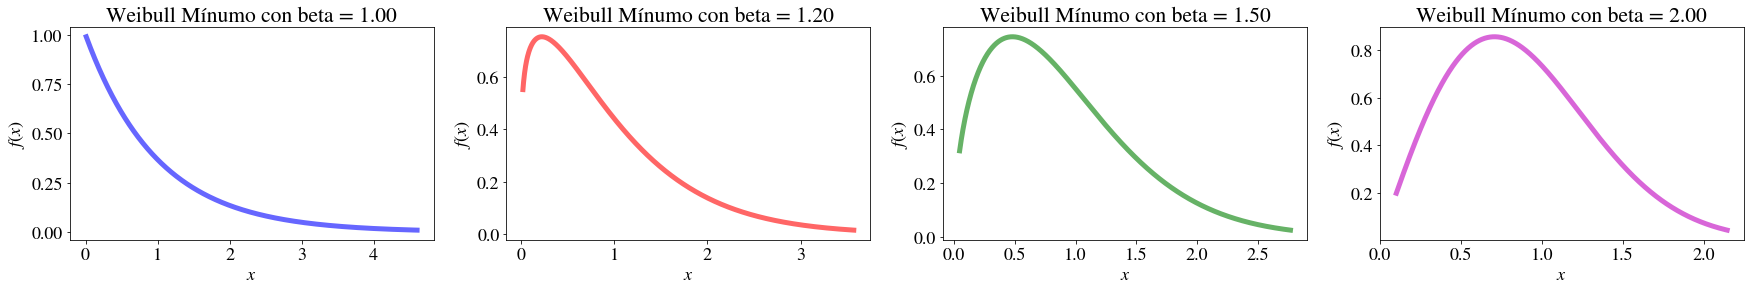

In [33]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

beta = 1,1.2,1.5,2

media_1, varianza_1, _, _ = weibull_min.stats(c = beta[0], moments = 'mvsk')
media_2, varianza_2, _, _ = weibull_min.stats(c = beta[1], moments = 'mvsk')
media_3, varianza_3, _, _ = weibull_min.stats(c = beta[2], moments = 'mvsk') 
media_4, varianza_4, _, _ = weibull_min.stats(c = beta[3], moments = 'mvsk')

print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[0], media_1, varianza_1))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[1], media_2, varianza_2))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[2], media_3, varianza_3))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[3], media_4, varianza_4))

x1 = np.linspace(weibull_min.ppf(0.01, beta[0]), weibull_min.ppf(0.99, beta[0]), 1000)
x2 = np.linspace(weibull_min.ppf(0.01, beta[1]), weibull_min.ppf(0.99, beta[1]), 1000)
x3 = np.linspace(weibull_min.ppf(0.01, beta[2]), weibull_min.ppf(0.99, beta[2]), 1000)
x4 = np.linspace(weibull_min.ppf(0.01, beta[3]), weibull_min.ppf(0.99, beta[3]), 1000)

f1 = weibull_min.pdf(x1, beta[0])
f2 = weibull_min.pdf(x2, beta[1])
f3 = weibull_min.pdf(x3, beta[2])
f4 = weibull_min.pdf(x4, beta[3])

fig = pyplot.figure(figsize=(30,18))
ax = fig.add_subplot(4, 4, 1)
pyplot.plot(x1, f1, 'b-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[0]))

ax = fig.add_subplot(4, 4, 2)
pyplot.plot(x2, f2, 'r-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[1]))

ax = fig.add_subplot(4, 4, 3)
pyplot.plot(x3, f3, 'g-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[2]))

ax = fig.add_subplot(4, 4, 4)
pyplot.plot(x4, f4, 'm-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Mínumo con beta = {:.2f}'.format(beta[3]))
pyplot.show()

### Función de distribución Weibull máximo

La función Weibull máxima, $X \sim Weimax(\beta)$, es una función que considera la teoría del valor extremo para limitar la distribución a una escala máxima. 

$$f(x;\beta) = \beta(-x)^{\beta - 1} \exp(-(-x)^\beta)$$

Al igual que en Weibull mínimo, $\beta$ cambia la forma de la envolvente de la función.

Veamos un ejemplo práctico de esta función.

la media y la varianza con beta = 1.00 son = -1.000 y 1.000
la media y la varianza con beta = 1.20 son = -0.941 y 0.620
la media y la varianza con beta = 1.50 son = -0.903 y 0.376
la media y la varianza con beta = 2.00 son = -0.886 y 0.215


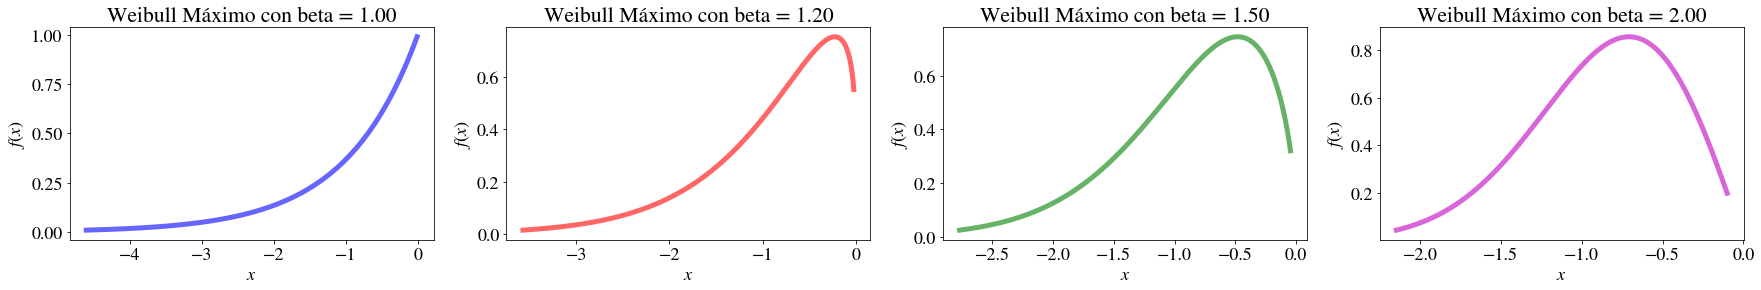

In [34]:
from scipy.stats import weibull_max
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

beta = 1,1.2,1.5,2

media_1, varianza_1, _, _ = weibull_max.stats(c = beta[0], moments = 'mvsk')
media_2, varianza_2, _, _ = weibull_max.stats(c = beta[1], moments = 'mvsk')
media_3, varianza_3, _, _ = weibull_max.stats(c = beta[2], moments = 'mvsk') 
media_4, varianza_4, _, _ = weibull_max.stats(c = beta[3], moments = 'mvsk')

print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[0], media_1, varianza_1))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[1], media_2, varianza_2))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[2], media_3, varianza_3))
print("la media y la varianza con beta = {:.2f} son = {:.3f} y {:.3f}".format(beta[3], media_4, varianza_4))

x1 = np.linspace(weibull_max.ppf(0.01, beta[0]), weibull_max.ppf(0.99, beta[0]), 1000)
x2 = np.linspace(weibull_max.ppf(0.01, beta[1]), weibull_max.ppf(0.99, beta[1]), 1000)
x3 = np.linspace(weibull_max.ppf(0.01, beta[2]), weibull_max.ppf(0.99, beta[2]), 1000)
x4 = np.linspace(weibull_max.ppf(0.01, beta[3]), weibull_max.ppf(0.99, beta[3]), 1000)

f1 = weibull_max.pdf(x1, beta[0])
f2 = weibull_max.pdf(x2, beta[1])
f3 = weibull_max.pdf(x3, beta[2])
f4 = weibull_max.pdf(x4, beta[3])

fig = pyplot.figure(figsize=(30,18))
ax = fig.add_subplot(4, 4, 1)
pyplot.plot(x1, f1, 'b-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[0]))

ax = fig.add_subplot(4, 4, 2)
pyplot.plot(x2, f2, 'r-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[1]))

ax = fig.add_subplot(4, 4, 3)
pyplot.plot(x3, f3, 'g-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[2]))

ax = fig.add_subplot(4, 4, 4)
pyplot.plot(x4, f4, 'm-', lw = 5, alpha = 0.6)
pyplot.xlabel('$x$')
pyplot.ylabel('$f(x)$')
pyplot.title('Weibull Máximo con beta = {:.2f}'.format(beta[3]))
pyplot.show()

# Teorema del límite central

El teorema del límite central muestra las razones por la cual se generan, por ejemplo, una distribución Gaussiana o Normal. En otras palabras, **determina si el límite de las distribuciones que mediante una *suma* de variables aleatorias son distribuciones normales o Gaussianas**.

Por lo general, hay muchos problemas que pueden ser resueltos con la distribución límite de la suma de variables aleatorias independientes (tal y como se mostro en el espacio de probabilidad), el cual lo denotamos como $\sum_{n=1}^N X_n$. Con el fin de evitar la obtención de esperanzas infinitas y varianzas de variedades aleatorias diferentes entre sí, es necesario normalizar $\sum_{n=1}^N X_n$. Para normarlizar la suma, es necesario asumir que $X$ tiene una esperanza finita y una varianza también finita. Por consiguiente:

$$\mathbb{E}\lbrack X_n \rbrack = \mu_n$$
$$\mathbb{V}[X_n] = \sigma_n^2$$
$$B_n^2 = \sum_{n=1}^N \sigma_n^2$$

Por consiguiente, la variable aleatoria se normaliza como la suma de la variable aleatoria independiente, $X_1, \ldots, X_n$:

$$Y_n = \sum_{n=1}^N \frac{X_n - \mu_n}{B_n}$$

donde $Y_1, \ldots, Y_n$, es la variable aleatoria normalizada que satisface el teorema del límite central.

En la sección *Función de distribución Gaussiana*, se observó este comportamiento cuando se normalizaba la distribución Gaussiana (Recomiendo ver de nuevo el ejemplo práctico).

Por otra parte, también recomiendo esta lectura complementaria: https://towardsdatascience.com/the-central-limit-theorem-and-its-implications-4a7adac9d6de

# Distribuciones bivariadas

Una distribución bivariada es una representación de una función de masa o de densidad de probabilidad para dos variables aleatorias, $X$ e $Y$, cuyos valores para cada variable son representados por $r$ y $s$. Considerando lo anterior, la probabilidad de un evento con dos variables aleatorias se representa como:

$$\mathbb{P}(X = r \cap Y = s)$$

La anterior representación existe para valores enteros de $r$ y $s$, el cual, al representarlo en un espacio de dos dimensiones, se obtene una distribución discreta $X$ e $Y$. 

Veamos un ejemplo práctico:

*Ejemplo:*

Considere que:

$$\mathbb{P}(X = r \cap Y = s) = \begin{cases} \frac{r + s}{52} & Si\,\, r \geq 0\,\, y\,\, s \leq 4 \\
0 & Otro\,\, caso \end{cases}$$

In [35]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import mpl_toolkits.mplot3d
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

r = np.arange(0,5,1)
s = np.arange(0,5,1)
P =  []
P = [(n + m)/52 for n in range(len(r)) for m in range(len(s))]
P = np.array(P)
P_XY = P.reshape(len(r),len(s))
print("Probabilidades Bivariadas r e s (Matriz) = \n", P_XY)

Probabilidades Bivariadas r e s (Matriz) = 
 [[0.         0.01923077 0.03846154 0.05769231 0.07692308]
 [0.01923077 0.03846154 0.05769231 0.07692308 0.09615385]
 [0.03846154 0.05769231 0.07692308 0.09615385 0.11538462]
 [0.05769231 0.07692308 0.09615385 0.11538462 0.13461538]
 [0.07692308 0.09615385 0.11538462 0.13461538 0.15384615]]


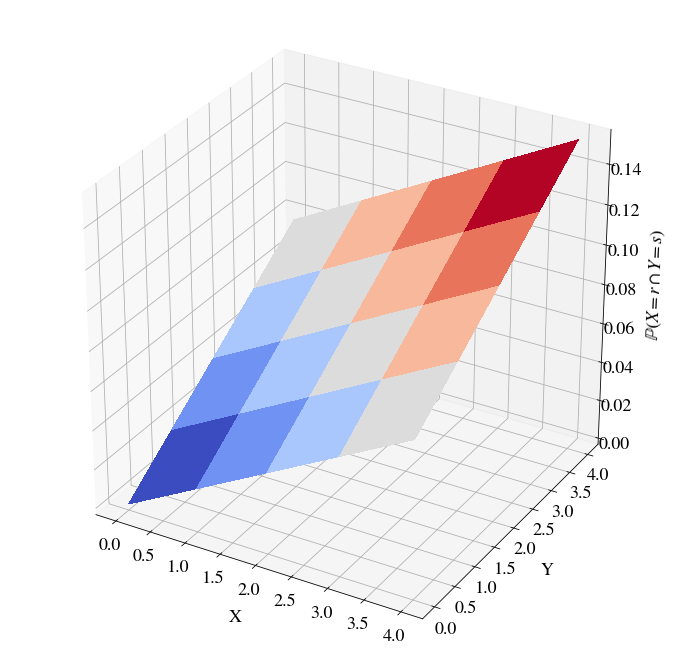

In [36]:
X, Y = np.meshgrid(r, s)
fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, P_XY, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X', labelpad=15)
ax.set_ylabel('Y', labelpad=15)
ax.set_zlabel('$\mathbb{P}(X = r \cap Y = s)$', labelpad=15)
ax.dist = 10
pyplot.show()

El anterior caso es válido para variables discretas pero veamos que sucede en con variables continuas. Consideremos ahora $X$ e $Y$ dos variables aleatorias continuas que se representa en un plano cartesiano $X,Y$. En este caso, la distribución bivariada estará asociado a una función de densidad de probabilidad, que lo representaremos como $f_{XY}(x,y)$, siendo que $x$ e $y$ dos elementos que pertenecen a $X$ e $Y$. 

Consideremos el siguiente ejemplo práctico:

$$f_{XY}(x,y) = \begin{cases} x + y & Si\,\, x \geq 0\,\,; \,\, y \leq 1 \\
0 & Otro\,\, caso \end{cases}$$

In [37]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import mpl_toolkits.mplot3d
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
F = []
F = [x[n]+y[m] for n in range(len(x)) for m in range(len(y))]
F = np.array(F)
F_XY = F.reshape(len(x),len(y))
print("Probabilidades Bivariadas Continuas X e Y (Matriz) = \n", F_XY)

Probabilidades Bivariadas Continuas X e Y (Matriz) = 
 [[0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]
 [0.02 0.03 0.04 ... 0.99 1.   1.01]
 ...
 [0.97 0.98 0.99 ... 1.94 1.95 1.96]
 [0.98 0.99 1.   ... 1.95 1.96 1.97]
 [0.99 1.   1.01 ... 1.96 1.97 1.98]]


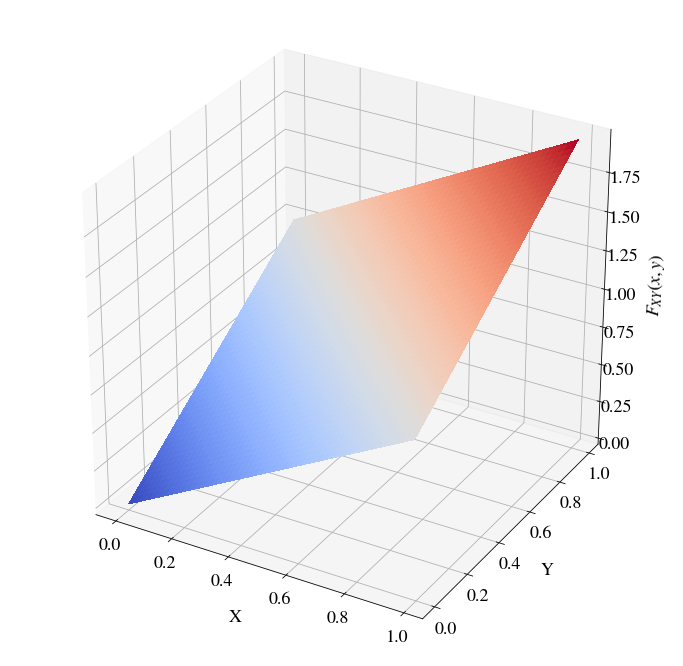

In [38]:
X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, F_XY, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X', labelpad=15)
ax.set_ylabel('Y', labelpad=15)
ax.set_zlabel('$F_{XY}(x,y)$', labelpad=15)
ax.dist = 10
pyplot.show()

## Distribución bivariada discreta

### Distribución bivariada Uniforme discreta

La función bivariada uniforme discreta, $X,Y \sim Unif(a_X,a_Y,b_X,b_Y)$, es una distribución bivariada discreta tal que tiene cuatro parámetros, $a_X,a_Y,b_X,b_Y$:

$$\mathbb{P}(X = x,Y = y) = \left ( \frac{1}{b_X - a_X + 1} \right ) \cdot \left ( \frac{1}{b_Y - a_Y + 1} \right )$$

donde $b_X \geq a_X$ y $b_Y \geq a_Y$.

Veamos un ejemplo práctico de esta distribución:

In [39]:
def randint2D(x,y,a_x,b_x,a_y,b_y):
  px = 1/(b_x - a_x + 1)
  py = 1/(b_y - a_y + 1)
  pxy = px*py
  P_XY = pxy*np.ones((len(x),len(y)))
  return P_XY.T 

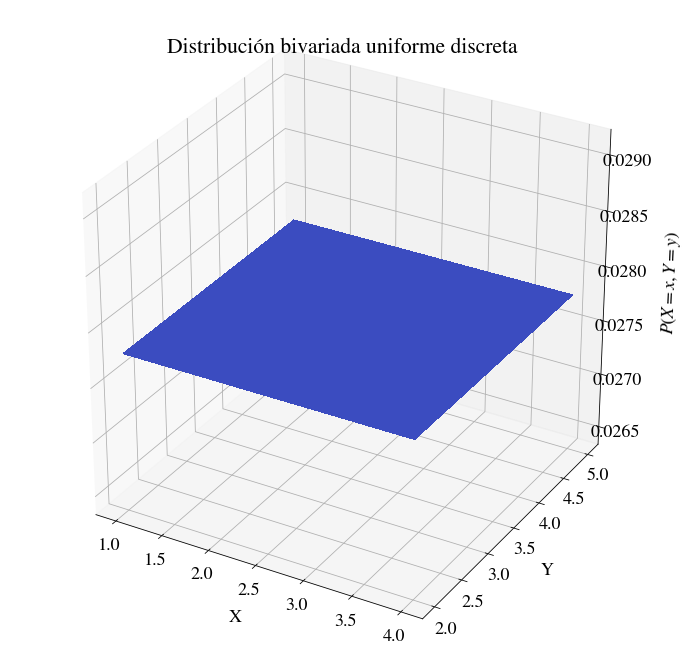

In [40]:
from scipy.stats import randint
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import mpl_toolkits.mplot3d
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

a_x, b_x = 1,6
a_y, b_y = 2,7

X = np.arange(randint.ppf(0.01, a_x, b_x), randint.ppf(0.99, a_x, b_x))
Y = np.arange(randint.ppf(0.01, a_y, b_y), randint.ppf(0.99, a_y, b_y))
P_XY = randint2D(X,Y,a_x,b_x,a_y,b_y)

XX, YY = np.meshgrid(X, Y)
fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, P_XY, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X', labelpad=15)
ax.set_ylabel('Y', labelpad=15)
ax.set_zlabel('$P(X=x, Y=y)$', labelpad=25)
ax.set_title('Distribución bivariada uniforme discreta')
ax.dist = 10
pyplot.show()

### Distribución bivariada Binomial

La función de distrtibución bivariada binomail, $X,Y \sim Bin(n)$, se considera que por cada parámetro $n$ hay dos eventos independientes, cada una con una probabilidad particular de éxito o acierto (tal y como se analizó en la distribución binomial estándar).

$$\mathbb{P}(X = x; Y = y) = \begin{cases} \left \lbrack \binom{n}{x} \rho_1^x (1-\rho_1)^{n-x} \right \rbrack \cdot \left \lbrack \binom{n}{y} \rho_2^y (1-\rho_2)^{n-y} \right \rbrack & 0 \leq \rho_1 \leq 1,\,\,; 0 \leq \rho_2 \leq 1,\,\, ; n \in \mathbb{N} \\
0 & otro\,\, caso \end{cases}$$

donde $\rho_1$ es la probabilidad de éxito de la variable $X$ y $\rho_2$ es la probabilidad de éxito de $Y$.

Veamos un ejemplo práctico de esta distribución:

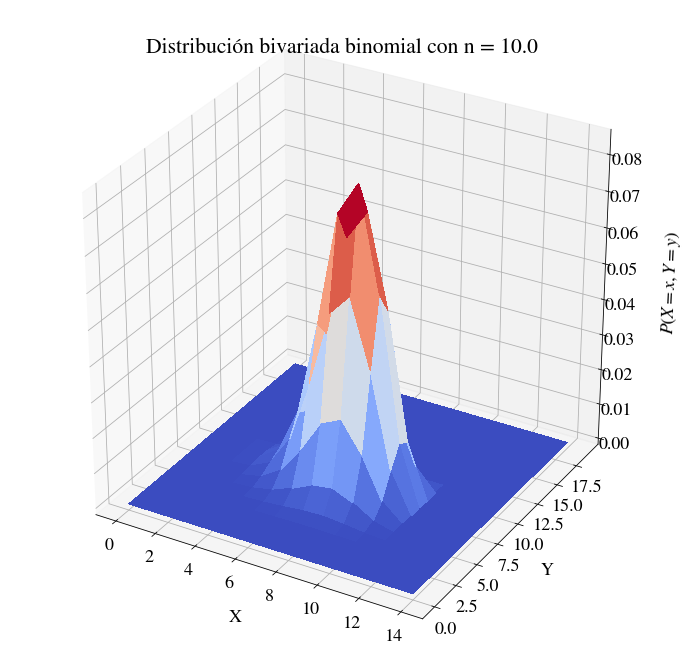

In [41]:
from scipy.stats import binom
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import mpl_toolkits.mplot3d
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

p1, p2 = 0.75, 0.8
n = 10
BIN_1 = binom(n, p1)
BIN_2 = binom(n, p2)

x = np.arange(15)
y = np.arange(20)

XX, YY = np.meshgrid(x,y)

P1 = BIN_1.pmf(XX)
P2 = BIN_2.pmf(YY)
P_XY = P1*P2

fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, P_XY, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X', labelpad=15)
ax.set_ylabel('Y', labelpad=15)
ax.set_zlabel('$P(X=x, Y=y)$', labelpad=25)
ax.set_title('Distribución bivariada binomial con n = {:.1f}'.format(n))
ax.dist = 10
pyplot.show()

**Nota:** En la unidad 2, se explicará la función bivariada Gaussiana con su interpretación e importancia en el análisis estadístico, entre otras aplicaciones.

# Distribución Marginal

La distribución marginal es una relación entre dos variables aleatorias discretas, $X$ e $Y$, que se define como una función $f(x,y)$, tal que la sumatoria de dos funciones $g(x)$ y $h(y)$ son distribuciones de probabilidad conjuntas, es decir:

$$g(x) = \sum_{x} f(x,y)$$

$$h(y) = \sum_{y} f(x,y)$$

Por lo general, este tipo de distribución son *bivariadas* (como vimos en secciones anteriores), lo cual se puede representar mediante una matriz. La matriz de probabilidades permite sumar las probabilidades de una variable $X$ y sumar las probabilidades de otra variable $Y$, permitiendo analizar dos eventos independientes para tomar una decisión. 

Veamos un ejemplo práctico de esta distribución




In [42]:
import numpy as np
import pandas as pd

Cafe_Especial = np.array([120, 400, 160, 199])
Cafe_Premium = np.array([50, 85, 81, 69])
Conjunto_Cafecitos = np.vstack((Cafe_Especial, Cafe_Premium))
Empresas = ['San Alberto', 'Delolita', 'Al alma', 'Revolucion']
Tipo = ['Cafe Especial','Cade Premium']

Datos = pd.DataFrame(data = Conjunto_Cafecitos, columns = Empresas, index = Tipo)
display(Datos)

,San Alberto,Delolita,Al alma,Revolucion
Cafe Especial,120,400,160,199
Cade Premium,50,85,81,69


In [43]:
suma_Filas = Conjunto_Cafecitos.sum(axis = 1)
suma_Columnas = Conjunto_Cafecitos.sum(axis = 0)
print('Suma de las Columnas = \n', suma_Columnas)
print('Suma de las Filas = \n', suma_Filas)

Suma de las Columnas = 
 [170 485 241 268]
Suma de las Filas = 
 [879 285]


In [44]:
Suma_Total_Columnas = suma_Columnas.sum()
Suma_Total_Filas = suma_Filas.sum()
print('Suma total de filas y columnas = {:.3f} y {:.3f}'.format(Suma_Total_Filas, Suma_Total_Columnas))

Suma total de filas y columnas = 1164.000 y 1164.000


Si queremos saber la probabilidad que las empresas de café tengan disponible ambos tipos de café, realizamos la siguiente operación:

In [45]:
Prob_Marginal = suma_Columnas/Suma_Total_Columnas
Empresas = ['San Alberto', 'Delolita', 'Al alma', 'Revolucion']
Resultados = pd.DataFrame(data = Prob_Marginal, index = Empresas, columns = ['Probabilidad Marginal'])
display(Resultados)

,Probabilidad Marginal
San Alberto,0.146048
Delolita,0.416667
Al alma,0.207045
Revolucion,0.230241


Si queremos saber la probabilidad de disponibilidad de algún tipo de café, considerando todas las empresas, entonces realizamos el siguiente cálculo:

In [46]:
Prob_Marginal_Cafes = suma_Filas/Suma_Total_Filas
Tipo = ['Cafe Especial','Cade Premium']
Resultados_Cafes = pd.DataFrame(data = Prob_Marginal_Cafes, index = Tipo, columns = ['Probabilidad Marginal'])
display(Resultados_Cafes)

,Probabilidad Marginal
Cafe Especial,0.755155
Cade Premium,0.244845


En este ejemplo, se observa que hay mayor probabilidad de comprar café tipo especial o premium en la empresa Delolita y hay mayor disponibilidad de café especial en todas las empresas de café.

Consideremos otro ejemplo con dos funciones continuas para determinar la independencia entre eventos, tal y como vimos en secciones anteriores.

$$g(x) = \begin{cases} 1 - \exp(-x) & Si\,\, x \geq 0 \\
0 & Otro\,\, caso\end{cases}$$

$$h(y) = \begin{cases} 1 - \exp(-y) & Si\,\, y \geq 0 \\
0 & Otro\,\, caso\end{cases}$$

Recordando en la teoría de la independencia de eventos que $\mathbb{P}(A \cap B) = \mathbb{P}(A)\cdot \mathbb{P}(B)$, entonces definimos: 

$$F(x,y) = g(x)\cdot h(y) = \begin{cases} 1 -  \exp(-x) - \exp(-y) + \exp(-x - y) & Si\,\, x,y \geq 0\\
0 & Otro\,\, caso\end{cases}$$

Verifiquemos con un ejemplo práctico

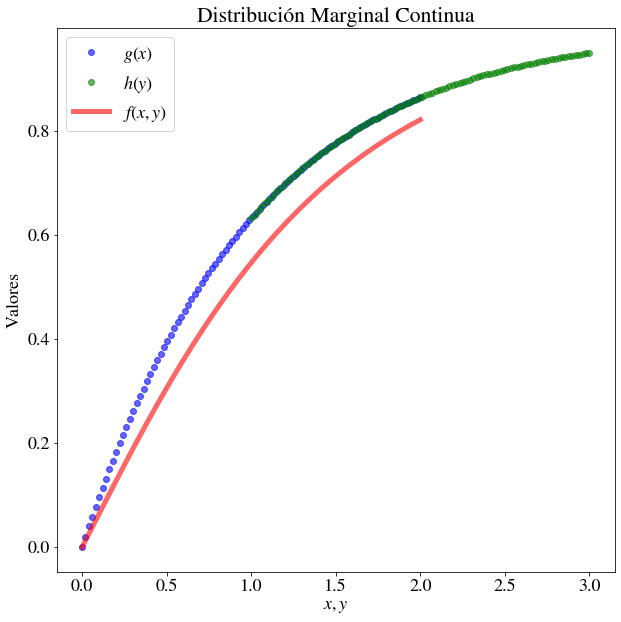

In [47]:
import numpy as np
import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.linspace(0,2,100)
y = np.linspace(1,3,100)
g_x = 1 - np.exp(-x)
h_y = 1 - np.exp(-y)
f_xy = g_x*h_y

pyplot.figure(figsize=(10,10))
pyplot.plot(x, g_x, 'ob', lw = 5, alpha = 0.6, label='$g(x)$')
pyplot.plot(y, h_y, 'og', lw = 5, alpha = 0.6, label='$h(y)$')
pyplot.plot(x, f_xy, 'r-', lw = 5, alpha = 0.6, label='$f(x,y)$')
pyplot.xlabel('$x,y$')
pyplot.ylabel('Valores')
pyplot.title('Distribución Marginal Continua')
pyplot.legend()
pyplot.show()

Observen que para cualquier $x$ e $y$, implica que ambas funciones son independientes entre sí y por consiguiente, $f(x,y)$ es una función de probabilidad conjunta que permite determinar una distribución marginal entre dos eventos independientes.

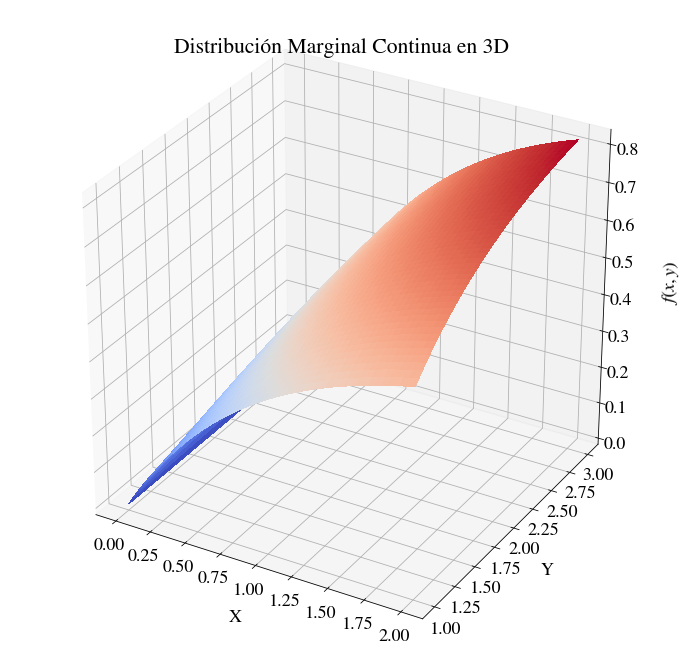

In [48]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import mpl_toolkits.mplot3d
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x = np.linspace(0,2,100)
y = np.linspace(1,3,100)
XX, YY = np.meshgrid(x, y)
g_x = 1 - np.exp(-XX)
h_y = 1 - np.exp(-YY)
f_xy = g_x*h_y

fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, f_xy, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X', labelpad=15)
ax.set_ylabel('Y', labelpad=15)
ax.set_zlabel('$f(x,y)$', labelpad=25)
ax.set_title('Distribución Marginal Continua en 3D')
ax.dist = 10
pyplot.show()

Veamos el siguiente ejemplo práctico sobre baterías. Supongamos que hay 2 baterías que son elegidos aleatoriamente para reemplazar un grupo de 12 baterías que están en una bodega. Hay 3 baterías nuevas, 4 baterías en uso, y 5 baterias con algún tipo de defecto. La selección de las 2 baterías se realiza SIN reemplazar de nuevo el grupo de baterías de la bodega. 

A partir de la anterior descripción, se desea construir una tabla de probabilidades que permita analizar las probabilidades que desde las 2 baterías salgan defectuosas, nuevas o en uso.

Si analizamos el problema, hay dos variables aleatorias:

$X$ = Número de baterías nuevas

$Y$ = Número de baterías usadas.

Cuando tenemos un problema de estas características, es necesario aplicar una combinación de las posibles situaciones o eventos que se puedan generar. Como se seleccionan solo 2 baterías aleatoriamente, entonces $X = \lbrace 0, 1,2\rbrace$ así como $Y = \lbrace 0, 1, 2\rbrace$. Porqué se analiza de esta forma el problema? Sencillo, suponga que en la primera elección sale una batería nueva y en la segunda elección sale de nuevo otra batería nueva, entonces $X = 2$, $Y = 0$. En otra tanda, por ejemplo, sale una batería nueva y luego sale una batería usada, por consiguiente, $X = 1$, $Y = 1$. De esta manera, es obvio decir que $X + Y \leq 2$. Lo anterior nos reduce el número de eventos posibles como calcularemos a continuación:

In [49]:
from math import factorial

def bin_comb(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

Recuerden que:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

In [50]:
import numpy as np

# Caso 1: Si X = 0 y Y = 0. En este caso, solo habría 5 baterías defectuosas. Para considerar todas las posibles combinariones de los casos, se calcula el binomial (n k)

Numero_baterias_elegidas = 2
Numero_baterias_bodega = 12
Numero_baterias_defectuosas = 5
Numero_total_selecciones_baterias = bin_comb(Numero_baterias_bodega, Numero_baterias_elegidas)
Numero_eventos_bateria_defectuosas = bin_comb(Numero_baterias_defectuosas, Numero_baterias_elegidas)
print("Número total de selecciones posibles de baterias = ", Numero_total_selecciones_baterias)
print("Número de eventos que salga baterías defectuosas = ", Numero_eventos_bateria_defectuosas)
Prob_X0_Y0 = Numero_eventos_bateria_defectuosas / Numero_total_selecciones_baterias
print('Probabilidad baterias defectuosas = {:.3f}'. format(Prob_X0_Y0))

Número total de selecciones posibles de baterias =  66
Número de eventos que salga baterías defectuosas =  10
Probabilidad baterias defectuosas = 0.152


La anterior operación corresponde a:

$$\mathbb{P}(X= 0,Y=0) = \frac{\binom{5}{2}}{\binom{12}{2}}$$

In [51]:
# Caso 2: Si X = 0 y Y = 1. En este caso, habría 4 baterías en uso y 5 baterias defectuosas, lo cual k = 1 porque solo habría un solo evento que salga batería en uso. Como son dos eventos independientes, entonces
# P_XY = P_X * P_Y como vimos en la independencia de los eventos:

Numero_baterias_elegidas = 1
Numero_baterias_defectuosas = 5
Numero_baterias_usadas = 4
Numero_eventos_baterias_con_una_bateria_usada = bin_comb(Numero_baterias_usadas, Numero_baterias_elegidas)
Numero_eventos_bateria_defectuosas_con_una_bateria_usada = bin_comb(Numero_baterias_defectuosas, Numero_baterias_elegidas)
Prob_X0_Y1 = (Numero_eventos_baterias_con_una_bateria_usada * Numero_eventos_bateria_defectuosas_con_una_bateria_usada) / Numero_total_selecciones_baterias
print('Probabilidad baterias defectuosas con una bateria usada = {:.3f}'. format(Prob_X0_Y1))

Probabilidad baterias defectuosas con una bateria usada = 0.303


La anterior operación corresponde a:

$$\mathbb{P}(X= 0,Y=1) = \frac{\binom{4}{1} \cdot \binom{5}{1}}{\binom{12}{2}}$$

In [52]:
# Caso 3: Si X = 0 y Y = 2. En este caso, habría 4 baterías usadas, lo cual k = 2. 

Numero_baterias_elegidas = 2
Numero_baterias_usadas = 4
Numero_eventos_baterias_con_dos_bateria_usada = bin_comb(Numero_baterias_usadas, Numero_baterias_elegidas)
Prob_X0_Y2 = Numero_eventos_baterias_con_dos_bateria_usada / Numero_total_selecciones_baterias
print('Probabilidad baterias defectuosas con dos bateria usadas = {:.3f}'. format(Prob_X0_Y2))

Probabilidad baterias defectuosas con dos bateria usadas = 0.091


La anterior operación corresponde a:

$$\mathbb{P}(X= 0,Y=2) = \frac{\binom{4}{2}}{\binom{12}{2}}$$

In [53]:
# Caso 4: Si X = 1 y Y = 0. En este caso, habría 3 baterías nuevas y 5 baterias defectuosas, lo cual k = 1.

Numero_baterias_elegidas = 1
Numero_baterias_defectuosas = 5
Numero_baterias_nuevas = 3
Numero_eventos_baterias_con_una_bateria_nueva = bin_comb(Numero_baterias_nuevas, Numero_baterias_elegidas)
Numero_eventos_bateria_defectuosas_con_una_bateria_usada = bin_comb(Numero_baterias_defectuosas, Numero_baterias_elegidas)
Prob_X1_Y0 = (Numero_eventos_baterias_con_una_bateria_nueva * Numero_eventos_bateria_defectuosas_con_una_bateria_usada) / Numero_total_selecciones_baterias
print('Probabilidad baterias defectuosas con una bateria nueva = {:.3f}'. format(Prob_X1_Y0))

Probabilidad baterias defectuosas con una bateria nueva = 0.227


La anterior operación corresponde a:

$$\mathbb{P}(X= 1,Y=0) = \frac{\binom{3}{1} \cdot \binom{5}{1}}{\binom{12}{2}}$$

In [54]:
# Caso 5: Si X = 2 y Y = 0. En este caso, habría 3 baterías nuevas, lo cual k = 2.

Numero_baterias_elegidas = 2
Numero_baterias_nuevas = 3
Numero_eventos_baterias_con_dos_bateria_nuevas = bin_comb(Numero_baterias_nuevas, Numero_baterias_elegidas)
Prob_X2_Y0 = Numero_eventos_baterias_con_dos_bateria_nuevas / Numero_total_selecciones_baterias
print('Probabilidad baterias defectuosas con dos bateria nuevas = {:.3f}'. format(Prob_X2_Y0))

Probabilidad baterias defectuosas con dos bateria nuevas = 0.045


La anterior operación corresponde a:

$$\mathbb{P}(X= 2,Y=0) = \frac{\binom{3}{2}}{\binom{12}{2}}$$

In [55]:
# Caso 6: Si X = 1 y Y = 1. En este caso, habría 3 baterías nuevas y 4 baterías nuevas para elegir, lo cual k = 1.

Numero_baterias_elegidas = 1
Numero_baterias_nuevas = 3
Numero_baterias_usadas = 4
Numero_eventos_baterias_con_una_bateria_nueva = bin_comb(Numero_baterias_nuevas, Numero_baterias_elegidas)
Numero_eventos_baterias_con_una_bateria_usada = bin_comb(Numero_baterias_usadas, Numero_baterias_elegidas)
Prob_X1_Y1 = (Numero_eventos_baterias_con_una_bateria_nueva * Numero_eventos_baterias_con_una_bateria_usada) / Numero_total_selecciones_baterias
print('Probabilidad baterias nuevas y usadas = {:.3f}'. format(Prob_X1_Y1))

Probabilidad baterias nuevas y usadas = 0.182


La anterior operación corresponde a:

$$\mathbb{P}(X= 1,Y=1) = \frac{\binom{3}{1} \cdot \binom{4}{1}}{\binom{12}{2}}$$

In [56]:
# Organizando en una tabla de probabilidad

import pandas as pd

Matriz_Probabilidad = np.array([[Prob_X0_Y0, Prob_X1_Y0, Prob_X2_Y0],[Prob_X0_Y1, Prob_X1_Y1, 0],[Prob_X0_Y2,0,0]])
Eventos = ['0', '1', '2']
Datos_Probabilidad = pd.DataFrame(data = Matriz_Probabilidad, columns = Eventos, index = Eventos)
display(Datos_Probabilidad)

,0,1,2
0,0.151515,0.227273,0.045455
1,0.303030,0.181818,0.000000
2,0.090909,0.000000,0.000000


Para este ejemplo, hay mayor probabilidad que al elegir las dos baterias, la primera batería salga usada y la segunda batería salga defectuosa, que corresponde al evento $X = 0$, $Y = 1$, con un valor de probabilidad marginal de $0.303030$. 

¿Qué sucedería si se suman todas la anteriores probabilidades?

In [57]:
Prob_total = (Datos_Probabilidad.sum()).sum()
print("Probabilidad total = {:.3f}".format(Prob_total))

Probabilidad total = 1.000


Por último, sumamos las filas y las columnas de la tabla de probabilidad para obtener finalmente las probabilidades marginales de cada evento:

In [58]:
Suma_Prob_Filas = np.sum(Matriz_Probabilidad, axis=1)
Suma_Prob_Columnas = np.hstack((np.sum(Matriz_Probabilidad, axis=0),1))
print("Suma de probabilidades filas: \n",Suma_Prob_Filas)
print("Suma de probabilidades columnas: \n",Suma_Prob_Columnas)

Suma de probabilidades filas: 
 [0.42424242 0.48484848 0.09090909]
Suma de probabilidades columnas: 
 [0.54545455 0.40909091 0.04545455 1.        ]


In [59]:
Arreglo_Fila = np.array(Suma_Prob_Filas, copy=False, subok=True, ndmin=2).T
MAT = np.column_stack([Matriz_Probabilidad,Arreglo_Fila])
MATRIZ = np.vstack((MAT,Suma_Prob_Columnas))
Columnas = ['0', '1', '2', 'Suma Probabilidad']
Filas = ['0', '1', '2', 'Suma Probabilidad']
Matriz_Probabilidades = pd.DataFrame(data = MATRIZ, columns = Columnas, index = Filas)
display(Matriz_Probabilidades)

,0,1,2,Suma Probabilidad
0,0.151515,0.227273,0.045455,0.424242
1,0.303030,0.181818,0.000000,0.484848
2,0.090909,0.000000,0.000000,0.090909
Suma Probabilidad,0.545455,0.409091,0.045455,1.000000


# Distribución Condicional

Recordando en secciones anteriores que la distribución condicional es la probabilidad de un evento $A$ dado un evento $B$ que ocurrío a priori:

$$\mathbb{P}(A\vert B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}$$

Vamos a considerar dos variables aleatorias $X$ e $Y$ con una probabilidad conjunta que simbolizaremos como $f_{XY}(x,y)$. A partir de la probabilidad conjunta, la *distribución condicional* de $Y$ dado $X = x$, se expresa como:

$$f_{Y\vert x}(y) = \frac{f_{XY}(x,y)}{f_X (x)}$$

Esta expresión determina que la distribución condicional es la probabilidad conjunta de $X$ e $Y$ sobre la distribución marginal, que simbolizaremos como $f_X (x)$, siendo que $f_X (x) > 0$. 

Otra forma de expresar la distribución condicional es cuando se desea conocer la probabilidad de $X$ dado $Y = y$:

$$f_{X\vert y}(x) = \frac{f_{XY}(x,y)}{f_Y (y)}$$

Veamos un ejemplo práctico de esta distribución, considerando el ejemplo anterior de las baterías:

In [60]:
display(Matriz_Probabilidades)

,0,1,2,Suma Probabilidad
0,0.151515,0.227273,0.045455,0.424242
1,0.303030,0.181818,0.000000,0.484848
2,0.090909,0.000000,0.000000,0.090909
Suma Probabilidad,0.545455,0.409091,0.045455,1.000000


In [61]:
# Caso 1: Probabilidad de Prob(X = 1, Y = 0)/P(Y = 0)

Prob_X1_cond_Y0 = Matriz_Probabilidades.iloc[0,1]/Matriz_Probabilidades.iloc[0,3]
print("Probabilidad de seleccionar una batería nueva DADO que la otra bateria es defectuosa = {:.3f}".format(Prob_X1_cond_Y0))

Probabilidad de seleccionar una batería nueva DADO que la otra bateria es defectuosa = 0.536


In [62]:
# Caso 2: Probabilidad de Prob(X = 0, Y = 0)/P(Y = 0)

Prob_X0_cond_Y0 = Matriz_Probabilidades.iloc[0,0]/Matriz_Probabilidades.iloc[0,3]
print("Probabilidad de seleccionar dos bateria defectuosas = {:.3f}".format(Prob_X0_cond_Y0))

Probabilidad de seleccionar dos bateria defectuosas = 0.357


In [63]:
# Caso 3: Probabilidad de Prob(X = 2, Y = 0)/P(Y = 0)

Prob_X2_cond_Y0 = Matriz_Probabilidades.iloc[0,2]/Matriz_Probabilidades.iloc[0,3]
print("Probabilidad de seleccionar dos bateria nuevas DADO que no hay bateria defectuosa = {:.3f}".format(Prob_X2_cond_Y0))

Probabilidad de seleccionar dos bateria nuevas DADO que no hay bateria defectuosa = 0.107


In [64]:
# Caso 4: Probabilidad de Prob(X = 0, Y = 1)/P(Y = 1)

Prob_X0_cond_Y1 = Matriz_Probabilidades.iloc[1,0]/Matriz_Probabilidades.iloc[1,3]
print("Probabilidad de seleccionar una batería defectuosa DADO que hay una bateria usada = {:.3f}".format(Prob_X0_cond_Y1))

Probabilidad de seleccionar una batería defectuosa DADO que hay una bateria usada = 0.625


In [65]:
# Caso 5: Probabilidad de Prob(X = 1, Y = 1)/P(Y = 1)

Prob_X1_cond_Y1 = Matriz_Probabilidades.iloc[1,1]/Matriz_Probabilidades.iloc[1,3]
print("Probabilidad de seleccionar una batería nueva DADO que hay una bateria usada = {:.3f}".format(Prob_X1_cond_Y1))

Probabilidad de seleccionar una batería nueva DADO que hay una bateria usada = 0.375


In [66]:
# Caso 6: Probabilidad de Prob(X = 0, Y = 2)/P(Y = 2)

Prob_X0_cond_Y2 = Matriz_Probabilidades.iloc[2,0]/Matriz_Probabilidades.iloc[2,3]
print("Probabilidad de seleccionar una batería defectuosa DADO que hay dos bateria usadas = {:.3f}".format(Prob_X0_cond_Y2))

Probabilidad de seleccionar una batería defectuosa DADO que hay dos bateria usadas = 1.000


In [67]:
# Matriz de probabilidades condicionales

import pandas as pd

Matriz_Prob_Condicional = np.array([[Prob_X0_cond_Y0, Prob_X1_cond_Y0, Prob_X2_cond_Y0],[Prob_X0_cond_Y1, Prob_X1_cond_Y1, 0],[Prob_X0_cond_Y2, 0, 0]])
Columnas = ['0', '1', '2']
Filas = ['0', '1', '2']
Matriz_PROBABILIDAD_CONDICIONAL = pd.DataFrame(data = Matriz_Prob_Condicional, columns = Columnas, index = Filas)
display(Matriz_PROBABILIDAD_CONDICIONAL)

,0,1,2
0,0.357143,0.535714,0.107143
1,0.625000,0.375000,0.000000
2,1.000000,0.000000,0.000000


Qué sucedería si sumamos las probabilidades de cada fila de la matriz?

In [68]:
PROBA_TOTAL = Matriz_PROBABILIDAD_CONDICIONAL.sum(axis = 1)
display(PROBA_TOTAL)

0    1.0
1    1.0
2    1.0
dtype: float64

Para este ejemplo, hay mayor probabilidad que salga una batería defectuosa dado que hay una batería usada, es decir, $\mathbb{P}(X = 0 \vert Y = 1)$, con un valor de probabilidad de $0.625$

# Densidad Kernel

Cuando se trabaja en escenarios reales, uno de los puntos de interes es encontrar la representación continua de una distribución de probabilidad con un conjunto de datos. Para lograr este objetivo, se estima una distribución no paramétrica que evite hasta lo posible la dependencia de parámetros de una función de densidad de probabilidad. En este caso, se utiliza una estrategía llamada **estimación de densidad Kernel**, que mediante un conjunto de datos obtenidos sin conocer su distribución de probabilidad, queremos estimar la representación continua de su distribución. Por lo general, existen varias funciones kernel como el **Kernel Lineal**, **Kernel Gaussiano**, **Kernel Sigmoidal** (para esta unidad, no nos centraremos en la parte matemática de la densidad Kernel debido a que es un tema extenso. Solamente nos centraremos en la parte fundamental), entre otras que generan la densidad alrededor de los datos.

Veamos un ejemplo práctico de la densidad kernel

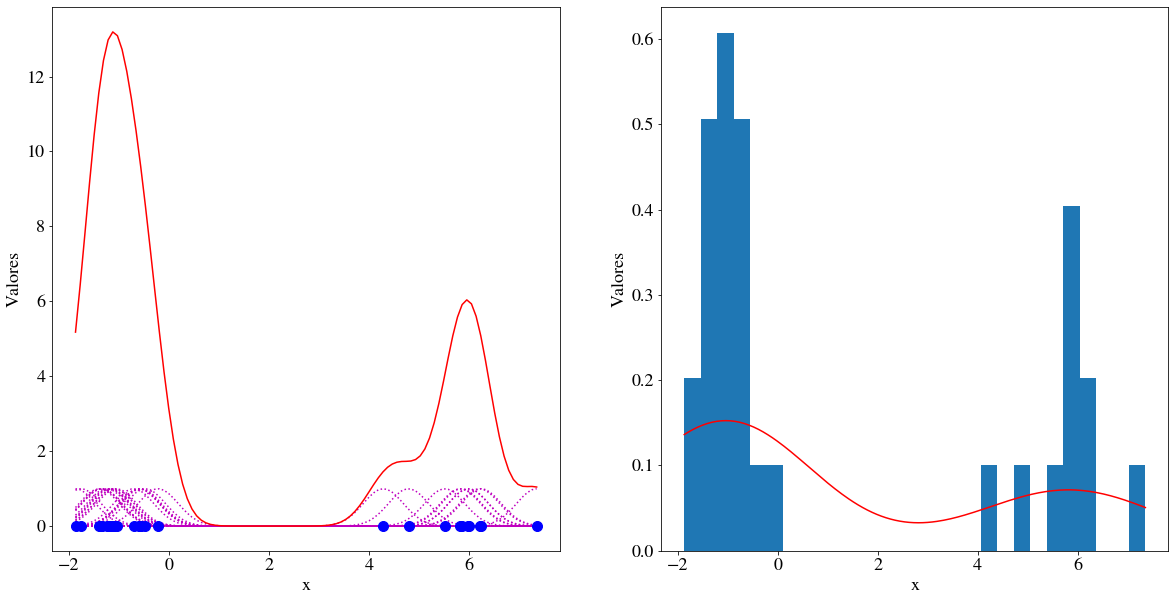

In [69]:
import numpy as np
from scipy.stats import norm 
import matplotlib
from matplotlib import pyplot
from scipy.stats import kde # kernel

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

x_1 = np.random.normal(-1, 0.5, 20)
x_2 = np.random.normal(6, 1, 10)
y = np.r_[x_1, x_2] 
x = np.linspace(min(y), max(y), 100)
s = 0.4 
kernels = np.transpose ([norm.pdf(x, yi , s) for yi in y])
densidad = kde.gaussian_kde(y)
x_ajuste = np.linspace(x.min(), x.max(), 200)

fig = pyplot.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, kernels , 'm:')
ax.plot(x, kernels.sum(1), 'r')
ax.plot(y, np.zeros(len(y)), 'bo', ms = 10)
pyplot.xlabel('x')
pyplot.ylabel('Valores')

ax = fig.add_subplot(1, 2, 2)
ax.hist(y, bins = 28, density = True)
ax.plot(x_ajuste, densidad(x_ajuste), 'r-')
pyplot.xlabel('x')
pyplot.ylabel('Valores')
pyplot.show()